# Graph network code for Jodie

In [172]:
# import pandas as pd
# import numpy as np
# import json

# df = pd.read_csv('./data/aruba/aruba.csv')

# with open('./data/aruba/aruba.json') as f:

#     jsonfile = json.load(f)

# # jsonfile


# print((df.values.shape))



# config = {"config": [

#     {"name": "Meal_Preparation", "id": 0},
#     {"name": "Relax", "id": 1},
#     {"name": "Eating", "id": 2},
#     {"name": "Work", "id": 3},
#     {"name": "Sleeping", "id": 4},
#     {"name": "Wash_Dishes", "id": 5},
#     {"name": "Bed_to_Toilet", "id": 6},
#     {"name": "Enter_Home", "id": 7},
#     {"name": "Leave_Home", "id": 8},
#     {"name": "Housekeeping", "id": 9},
#     {"name": "Respirate", "id": 10},
#     {"name": "Idle", "id": 11}
# ]
# }

# # for all the values that are 1 in the sensor
# # user_id = room_id (json)
# # item_id = sensor_id(json)
# # comma_separated_list_of_features = [SensorType(json), Spos(json), value(csv), time_of_the__day(csv), rtype, room_location ]
# # state_label = activity (from csv for that row)

# columns = df.columns[4:]
# rows = []
# for i, row in enumerate(df.values):

#     if i == 100:
#         break
#         # get names of column where value is 1
#     sensor_True_Col = np.nonzero(row[4:] == 1)[0]
#     if sensor_True_Col.size != 0:
#         # print(i)
#         for val in sensor_True_Col:
#             # print(columns[val])
#             sensorName = columns[val]
#             # print(row)
#             row_rBedPressureRightoom = [row_room for row_room in jsonfile['rooms_location'] if sensorName in row_room['sensorsInRoom']][
#                 0]
#             user_id = row_room['id']

#             row_sensor = [[row_sensor['id'], row_sensor['location'], row_sensor['name']] for row_sensor in
#                           jsonfile['sensor_location'] if row_sensor['name'] == sensorName]
#             item_id = row_sensor[0][0]
#             row_sensor_name = row_sensor[0][2]
#             sensor_type = [155 if row_sensor_name.startswith('D') else 13][0]
#             sensorPosition = row_sensor[0][1]
#             value = 1
#             timestamp = row[3]
#             state_label = [className['id'] for className in config['config'] if className['name'] == row[2]][0]
#             comma_separated_list_of_features = np.array(
#                 [sensor_type, sensorPosition[0], sensorPosition[1], value, timestamp, row_room['id'],
#                  ])

#             B = np.copy(np.array([user_id, item_id, timestamp, state_label, comma_separated_list_of_features]))
#             rows.append(B)

#     else:
#         state_label = [className['id'] for className in config['config'] if className['name'] == row[2]][0]
#         rows.append(np.array(
#             [user_id, item_id, row[3], state_label, np.array([sensor_type, sensorPosition[0], sensorPosition[1], 0, row_room['id']])]))

# wikiDataFrame = pd.DataFrame(rows, columns=['user_id', 'item_id', 'timestamp', 'state_label',
#                                             'comma_separated_list_of_features'])

# wikiDataFrame.to_csv('wikipedia.csv')





# Make Master CSV

In [65]:
import pandas as pd
import numpy as np
import json


# houseC = pd.read_csv('../../data/master/houseC.csv')
# ordonezB = pd.read_csv('../../data/master/ordonezB.csv')

with open('../../data/master/master.json') as f:

    masterJson = json.load(f)

In [66]:
#!/usr/bin/env python
config = {
"learning_rate" : 0.0001,
"num_epochs" : 150,
"decay" : 1e-5,
"input_dim" : 48,
"hidden_dim" : 64,
"layer_dim" : 1,
"output_dim" : 16,
"seq_dim" : 2,
"batch_size" :8,
"split_ratio" : 0.5,
"num_workers":4,
"accumulation_steps": 1,
"no_of_subset":30 ,
"subset_overlap_length": 2 ,
"resize_width": 120,
"resize_height": 97,
"image_width": 663,
"image_height": 446,
"ActivityIdList":
         [{'name': 'washDishes', 'id': 0},
         {'name': 'goToBed', 'id': 1},
         {'name': 'brushTeeth', 'id': 2},
         {'name': 'prepareLunch', 'id': 3},
         {'name': 'eating', 'id': 4},
         {'name': 'takeShower', 'id': 5},
         {'name': 'leaveHouse', 'id': 6},
         {'name': 'getDrink', 'id': 7},
         {'name': 'prepareBreakfast', 'id': 8},
         {'name': 'getSnack', 'id': 9},
         {'name': 'idle', 'id': 10},
         {'name': 'grooming', 'id': 11},
         {'name': 'prepareDinner', 'id': 12},        
         {'name': 'relaxing', 'id': 13},
         {'name': 'useToilet', 'id': 14}],

"merging_activties" : {
        "loadDishwasher": "washDishes",
        "unloadDishwasher": "washDishes",
        "loadWashingmachine": "washClothes",
        "unloadWashingmachine": "washClothes",
        "receiveGuest": "relaxing",
        "eatDinner": "eating",
        "eatBreakfast": "eating",
        "getDressed": "grooming",
        "shave": "grooming",
        "takeMedication": "idle",
        "leave_Home": "leaveHouse",
        "Sleeping": "goToBed",
        "Bed_to_Toilet": "useToilet",
        "Enter_Home": "idle",
        "Respirate": "relaxing",
        "Work": "idle",
        "Housekeeping": "idle",
        "Idle": "idle",
        "watchTV": "relaxing"
    },
 "ob_representation": False,
 "leaveOneHouseOut": True
}

In [67]:
df = pd.DataFrame()
for key in masterJson.keys():            
    currentCSV = key + '.csv'
    currentCSV = pd.read_csv('../../data/' + key + '/' + currentCSV)
    
    temp = currentCSV[['start', 'end', 'activity', 'time_of_the_day']].copy()
   
    for dictionary in masterJson[key]:
        genericColumn = list(dictionary.keys())[0]            
        specificColumn = dictionary[genericColumn][0]['name']             
        temp[genericColumn] = currentCSV[specificColumn]
        
    df = pd.concat([df, temp])
    df = df.fillna(-1)
    df.iloc[:,4:] = df[df.columns[4:]].apply(pd.to_numeric, downcast='integer')    


In [68]:
print('Before mapping \n\n')

print(df['activity'].groupby(df['activity']).count())
df['activity'] = df['activity'].map(config['merging_activties']).fillna(df['activity'])

print('\n \n \n After mapping \n\n ')
print(df['activity'].groupby(df['activity']).count())
df.to_csv('../../data/master/master.csv', index=False)

Before mapping 


activity
brushTeeth            173
eatBreakfast          136
eatDinner              49
eating                365
getDressed            128
getDrink               80
getSnack              486
goToBed             44029
grooming              569
idle                16033
leaveHouse          50863
prepareBreakfast      676
prepareDinner         830
prepareLunch          779
shave                  63
takeMedication         11
takeShower            715
useToilet             914
washDishes             31
watchTV             17571
Name: activity, dtype: int64

 
 
 After mapping 

 
activity
brushTeeth            173
eating                550
getDrink               80
getSnack              486
goToBed             44029
grooming              760
idle                16044
leaveHouse          50863
prepareBreakfast      676
prepareDinner         830
prepareLunch          779
relaxing            17571
takeShower            715
useToilet             914
washDishes             31
N

# Getting Unique activities in CSV's


In [196]:
!pwd

/home/harsh/Downloads/Thesis/Graph/dgl/related_code/3-basics


# Making Nodes and Edges for graph through house json file

In [3]:

import os
import json
import pandas as pd
import numpy as np
import json

file_names = ['houseA', 'houseB', 'houseC', 'ordonezA', 'ordonezB']

rooms_across_all_house = {'Toilet': 0, 'Bathroom': 1, 'Kitchen': 2, 'Bedroom': 3, 'Hall': 4, 'Office': 5, 'LivingRoom': 6, 'OutsideRegion': 7}

total_rooms = 0
for file_name in file_names:

    json_file_name = file_name + '.json'
    csv_file_name = file_name + '.csv'

    json_file = os.path.join('../../data', file_name, json_file_name)
    csv_file = os.path.join('../../data', file_name, csv_file_name)

    with open(json_file) as f:
        json_file = json.load(f)

    csv_file = pd.read_csv(csv_file)

    locations = json_file['locations']

    sensors = json_file['sensors']
    def sensor_place_in_house_ID(col_name, location_id=1):
        # Find sensor dict and take the location key, whose name matches with col names
        location_id = [x['location'] for x in sensors if x['name'] == col_name][0]
        if len(location_id) == 1:
            location_type = [x['type'] for x in locations if x['id'] == location_id[0]][0]
            return [rooms_across_all_house[location_type]]
        else:
            items = []
            for item in location_id:
                location_type = [x['type'] for x in locations if x['id'] == item][0]
                items.append(rooms_across_all_house[location_type])
            return items


    # get rooms as nodes first, by giving them id and make a dictionary of their features
    nodes_dictionary_list = []
    d = {}

    # Sensor place in house will be taken from here, the index will represent place in house of sensor
    rooms = [name['type'] for name in locations]
    count = 0
    # convert it into a dictionary list
    for i, node in enumerate(rooms):
        d = {}
        d['Id'] = count
        d['Object'] = node

        d['Value'] = -1
        d['place_in_house'] = rooms_across_all_house[node]
        d['Type'] = 1

        # Room id will be taken from here
        count += 1
        nodes_dictionary_list.append(d)
        # if node not in rooms_across_all_house:
        #     rooms_across_all_house[node] = total_rooms
        #     total_rooms += 1

    # csv column names
    col = list(csv_file.columns[4:].values)

    for i, col_name in enumerate(col):
        Id = i
        Object = col_name.split('_')[0]
        Value = -1
        place_in_house = sensor_place_in_house_ID(Object)
        Type = 0

        # Append to nodes_dictionary_list

        for location_id in place_in_house:
            d = {}
            d['Id'] = len(nodes_dictionary_list)
            d['Object'] = Object
            d['Value'] = -1
            d['Type'] = 0
            d['place_in_house'] = location_id
            nodes_dictionary_list.append(d)

    # Adding time of the day as the last node

    d = {}
    d['Id'] = len(nodes_dictionary_list)
    d['Object'] = 'time_of_the_day'
    d['Value'] = -1
    d['Type'] = -1
    d['place_in_house'] = -1

    nodes_dictionary_list.append(d)

    # print(list(nodes_dictionary_list))

    import csv

    toCSV = nodes_dictionary_list

    # json_file = os.path.join('../../data', file_name)

    keys = toCSV[0].keys()
    with open(os.path.join('../../data', file_name, 'nodes.csv'), 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(toCSV)

    # Write Edge.csv

    # Make a list of src and destination and write it via pandas
    Src = []
    Dst = []
    for node_dict in nodes_dictionary_list:
        if node_dict['Type'] == 0:
            # Birectional Edges
            Src.append(node_dict['Id'])
            Dst.append(node_dict['place_in_house'])

            Src.append(node_dict['place_in_house'])
            Dst.append(node_dict['Id'])

    # Connect rooms

    for location_dict in locations:
        src_location_id = rooms.index(location_dict['type'])

        reaches_list = location_dict['reaches']
        for reach_id in reaches_list:
            Type = [x['type'] for x in locations if x['id'] == reach_id][0]
            dst_location_id = rooms.index(Type)
            Src.append(src_location_id)
            Dst.append(dst_location_id)

    Src.append(nodes_dictionary_list[-1]['Id'])
    Dst.append(nodes_dictionary_list[-1]['Id'])

    df = pd.DataFrame({'Src': Src, 'Dst': Dst})
    df.to_csv(os.path.join('../../data', file_name, 'bidrectional_edges.csv'), index=False)
# print(rooms_across_all_house)

# Maping Activity 

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import json

In [297]:
# {'name': 'brushTeeth', 'id': 0}

merging_activties = {
"loadDishwasher": "washDishes",
"unloadDishwasher": "washDishes",
"loadWashingmachine": "washClothes",
"unloadWashingmachine": "washClothes",
"receiveGuest": "relaxing",
"eatDinner": "eating",
"eatBreakfast": "eating",
"getDressed": " grooming",
"shave": "grooming",
"getDressed": " grooming",
"takeMedication": "idle",
"leave_Home": "leaveHouse",
"Sleeping": "goToBed",
"Bed_to_Toilet": "useToilet",
"Enter_Home": "idle",
"Respirate": "relaxing",
"Work": "idle",
"Housekeeping": "idle",
"watchTV": "relaxing"
}

In [298]:
houseA = ['idle', 'leaveHouse', 'eating', 'useToilet', 'takeShower', 'brushTeeth', 'goToBed', 'prepareBreakfast', 'prepareDinner', 'getSnack', 'getDrink', 
    'loadDishwasher', 'unloadDishwasher', 'storeGroceries', 'loadWashingmachine', 'unloadWashingmachine', 'receiveGuest']


houseB = ['brushTeeth', 'eatBreakfast', 'eatDinner', 'getDressed', 'getDrink', 'goToBed', 'idle', 'leaveHouse', 'prepareBreakfast', 'prepareDinner', 'takeShower', 'useToilet', 'washDishes']


houseC = ['brushTeeth', 'eating', 'getDressed', 'getDrink', 'getSnack', 'goToBed', 'idle', 'leaveHouse', 'prepareBreakfast', 'prepareDinner', 'prepareLunch', 'shave', 'takeMedication', 'takeShower', 'useToilet']

#aruba = ['Bed_to_Toilet', 'Eating', 'Enter_Home', 'Housekeeping', 'Idle', 'Leave_Home', 'Meal_Preparation', 'Relax', 'Respirate', 'Sleeping', 'Wash_Dishes', 'Work']


ordonezA = ['idle', 'goToBed', 'useToilet', 'takeShower', 'prepareBreakfast', 'prepareLunch', 'grooming', 'watchTV', 'leaveHouse', 'getSnack', 'prepareDinner']

ordonezB = ['getSnack', 'goToBed', 'grooming', 'idle', 'leaveHouse', 'prepareBreakfast', 'prepareDinner', 'prepareLunch', 'takeShower', 'useToilet', 'watchTV']

In [299]:
all_houses = [houseA, houseB, houseC, ordonezA, ordonezB]
final_activity_list = []

for house in all_houses:
    for activity in house:
        try:
            mappedActivity = merging_activties[activity]
            final_activity_list.append(mappedActivity)
        except:
            final_activity_list.append(activity)
            

In [300]:
final_activity_list = [x for x in final_activity_list]

In [301]:
final_activity_list = (set(final_activity_list))

In [302]:
final_activity_list = [{"name": activity, "id":idx} for idx, activity in enumerate(final_activity_list)]

In [303]:
final_activity_list

[{'name': 'prepareDinner', 'id': 0},
 {'name': 'washDishes', 'id': 1},
 {'name': 'prepareBreakfast', 'id': 2},
 {'name': 'prepareLunch', 'id': 3},
 {'name': 'useToilet', 'id': 4},
 {'name': 'takeShower', 'id': 5},
 {'name': 'leaveHouse', 'id': 6},
 {'name': 'brushTeeth', 'id': 7},
 {'name': 'getSnack', 'id': 8},
 {'name': ' grooming', 'id': 9},
 {'name': 'getDrink', 'id': 10},
 {'name': 'goToBed', 'id': 11},
 {'name': 'eating', 'id': 12},
 {'name': 'grooming', 'id': 13},
 {'name': 'idle', 'id': 14},
 {'name': 'storeGroceries', 'id': 15},
 {'name': 'relaxing', 'id': 16},
 {'name': 'washClothes', 'id': 17}]

# OB representation, Generate Benchmarking Papers' CSV, then to be passed to LSTM)

In [220]:
# (a) x <= 5
# (d) 60 < x <= 120 
# (f) 150 < x <= 660
# (b) 5 < x <= 30 
# (e) 120 < x <= 150 
# (g) x > 660
# (c) 30 < x <= 60

import pandas as pd
import numpy as np
import pandas as pd
import json

In [221]:
df = pd.read_csv('../../data/master/master.csv')
# df = pd.read_csv('../../data/houseC/houseC.csv')

In [222]:
col = df.columns.tolist()

In [223]:
seq_length = 1
prev_index = 0
seq_list = []

# Go over Master.csv line by line, this loop will give you each unique sequence frequency.
# you can get ith index from this by just adding sequence till i and subtacting 1 from it. 
for index, row in df[:-1].iterrows():     
    # Starting from 0 as prev_index concatenate sensor values
    prev_value = df.iloc[prev_index, 4:]
    prev_value = ''.join(map(str, prev_value.values))
    
    # if pervious value == next to the row that you are currently operating. Increment the sequence_length
    if prev_value == ''.join(map(str, df.iloc[index + 1, 4:].values)):
        seq_length += 1
        if index == len(df) - 2:
            seq_list.append(seq_length)
            seq_length = 1
            prev_index = index + 1  
        
    
        
    # Else, append the seq_length, seq_length to 1 and make prev_index = next row. because
    # till index row things are done. 
    else:        
        seq_list.append(seq_length)
        seq_length = 1
        prev_index = index + 1           


# sum_list =  row to be choosen in new dataframe.
sum_list = []
for i in range(len(seq_list)):
    sum_list.append(sum(seq_list[:i + 1]) - 1)
# print('final rows list  ',sum_list)

# Seq_list = unary representation for each unique
# print('seq list ',  seq_list)


truncatedDataframe = pd.DataFrame([])

for index, x in enumerate(sum_list):    
        truncatedDataframe = truncatedDataframe.append(df.iloc[sum_list[index] ,:])

truncatedDataframe = truncatedDataframe[col]
truncatedDataframe.head()
    
# convert each value according to bin, 
bins_seq_list = np.copy(seq_list)
for i, x in enumerate(bins_seq_list):
    if x <= 5:
        bins_seq_list[i] = 1
    elif 5 < x <= 30:
        bins_seq_list[i] = 2
    elif 30 < x <= 60:
        bins_seq_list[i] = 3
    elif 60 < x <= 120:
        bins_seq_list[i] = 4
    elif 120 < x <= 150:
        bins_seq_list[i] = 5
    elif 150 < x <= 660:
        bins_seq_list[i] = 6
    elif x > 660:
        bins_seq_list[i] = 7
        

            

In [226]:
seq_list

[188,
 1,
 1,
 1,
 18,
 1,
 2,
 2,
 2,
 1,
 62,
 1,
 1,
 456,
 1,
 5,
 2,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 18,
 1,
 2,
 3,
 9,
 2,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 4,
 1,
 16,
 1,
 1,
 1,
 2,
 2,
 9,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 3,
 1,
 13,
 1,
 1,
 19,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 4,
 4,
 8,
 4,
 7,
 1,
 12,
 1,
 1,
 10,
 1,
 2,
 1,
 4,
 4,
 4,
 1,
 3,
 1,
 15,
 1,
 18,
 1,
 8,
 2,
 1,
 1,
 1,
 1,
 1,
 27,
 1,
 1,
 7,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 28,
 1,
 10,
 1,
 45,
 1,
 1,
 1,
 18,
 1,
 1,
 4,
 1,
 7,
 1,
 1,
 62,
 1,
 4,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 114,
 1,
 1,
 1,
 6,
 1,
 4,
 1,
 2,
 1,
 1,
 78,
 1,
 1,
 1,
 1,
 15,
 1,
 1,
 39,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 100,
 1,
 1,
 1,
 442,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 5,
 4,
 4,
 2,
 3,
 3,
 1,
 4,
 1,
 10,
 1,
 17,
 1,
 1,
 1,
 1,
 34,
 1,
 2,
 1,
 168,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,


In [182]:

# convert to unary representation
final_unary_list = []

for i in range(len(bins_seq_list)):
    gn_list = 7 * [0]
    ones_list = np.ones(bins_seq_list[i], dtype = int)
    zero_list = np.zeros(7 - bins_seq_list[i], dtype = int)
    unary_list = np.append(ones_list , zero_list)
    final_unary_list.append(unary_list)
    

In [183]:
# [{"name": activity, "id":idx} for idx, activity in enumerate(pd.unique( df['activity']))]

In [184]:
truncatedDataframe['one_hot_time_of_the_day'] = round(truncatedDataframe['time_of_the_day'] * 24)
final_one_hot_time_of_day = []
for val in truncatedDataframe['one_hot_time_of_the_day']:            
    a = np.zeros(25, dtype = int)
    a[int(val)] =  1
    final_one_hot_time_of_day.append(a)


In [185]:
truncatedDataframe = truncatedDataframe.set_index(np.arange(truncatedDataframe.shape[0]))

In [186]:
# type(final_one_hot_time_of_day[0][0])

In [187]:
# truncatedDataframe['one_hot_time_of_the_day'] = final_one_hot_time_of_day

In [188]:
np.array(final_one_hot_time_of_day).shape
one_hot_time_of_the_day = pd.DataFrame(np.array(final_one_hot_time_of_day), columns=['one_hot_' + str(i) for i in range(np.array(final_one_hot_time_of_day).shape[1])])
# one_hot_time_of_the_day

In [189]:

final_unary_list = pd.DataFrame(final_unary_list, columns=['unary_' + str(i) for i in range(np.array(final_unary_list).shape[1])])

# final_unary_list



In [206]:
final_csv = pd.concat([truncatedDataframe, one_hot_time_of_the_day, final_unary_list], axis =1)


In [207]:
# Shuffling the column to restore the original order
col = final_csv.columns.values.tolist()

cols = ['start', 'end', 'activity', 'time_of_the_day', 'one_hot_time_of_the_day']

col = [x for x in col if x not in cols]
col.insert(0, 'start')
col.insert(1, 'end')
col.insert(2, 'activity')
col.insert(3, 'time_of_the_day')

final_csv = final_csv[col]

In [208]:
final_csv.iloc[:, 3:] = final_csv.iloc[:, 3:].apply(pd.to_numeric, downcast='integer')

/home/harsh/anaconda3/envs/ds/lib/python3.7/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [209]:
final_csv.to_csv('../../data/master/ob_master.csv', index=False)

# final_csv.to_csv('../../data/houseC/ob_houseC.csv', index=False)

In [113]:
# final_csv.to_pickle('../../../../../Thesis/dummyTestforPycharm/data/houseA/one_hot.csv')

# final_csv.to_csv('../../../../../Thesis/dummyTestforPycharm/data/houseA/one_hot.csv', index=False)

In [205]:
final_csv.head()


,start,end,activity,BedPressureRight,BasinBathroomPIR,ToiletFlushSensor,ShowerBathroomPIR,FridgeMagnetic,GroceriesCupboard,Microwave,...,one_hot_22,one_hot_23,one_hot_24,unary_0,unary_1,unary_2,unary_3,unary_4,unary_5,unary_6
0,12-Nov-2012 00:21:00,12-Nov-2012 00:21:59,relaxing,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0
1,12-Nov-2012 00:22:00,12-Nov-2012 00:22:59,relaxing,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,12-Nov-2012 00:23:00,12-Nov-2012 00:23:59,idle,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,12-Nov-2012 00:24:00,12-Nov-2012 00:24:59,relaxing,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,12-Nov-2012 00:42:00,12-Nov-2012 00:42:59,relaxing,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


### Decompress theabove CSV to original so as to use them in evaluation, just to get labels.

In [204]:
import datetime as dt
from datetime import timedelta

compressed = final_csv
compressed = compressed.loc[compressed.index.repeat(seq_list)].reset_index(drop=True)

master = df
compressed['start'] = master['start']
compressed['end'] = master['end']

# curr = compressed['start'][0]
# end = compressed['end'][0]
# FMT = '%d-%b-%Y %H:%M:%S'

# if not isinstance(curr, dt.datetime):    
#     curr = dt.datetime.strptime(curr, FMT)
#     end = dt.datetime.strptime(end, FMT)
    

# for index, row in compressed.iterrows():      
#     curr = dt.datetime.strftime(curr, FMT)
#     compressed['start'][index] = curr 
#     if not isinstance(curr, dt.datetime):    
#         curr = dt.datetime.strptime(curr, FMT)    
#     curr = curr + timedelta(seconds=60)  
    
    
#     end = dt.datetime.strftime(end, FMT)
#     compressed['end'][index] = end 
#     if not isinstance(end, dt.datetime):    
#         end = dt.datetime.strptime(end, FMT)
#     end = end + timedelta(seconds=60)  


compressed.to_csv('../../data/master/decompressed_OB_master.csv', index=False)


In [ ]:
final_csv.head()

## Making confusion matrix


In [40]:
import pandas as pd
import numpy as np
import json
import seaborn as sn
import matplotlib.pyplot as plt

In [38]:
def getClassnameFromID(train_label):
    ActivityIdList = config['ActivityIdList']
    train_label = [x for x in ActivityIdList if x["id"] == int(train_label)]
    return train_label[0]['name']


In [42]:
test_CfMatrix  = np.load('../../data/all_houses/test_confusion_matrix.npy')
train_cfMatrix  = np.load('../../data/all_houses/train_confusion_matrix.npy')

In [39]:
config = {
    "batch_size": 32,
    "ActivityIdList":
         [{'name': 'washDishes', 'id': 0},
         {'name': 'goToBed', 'id': 1},
         {'name': 'brushTeeth', 'id': 2},
         {'name': 'prepareLunch', 'id': 3},
         {'name': 'eating', 'id': 4},
         {'name': 'takeShower', 'id': 5},
         {'name': 'leaveHouse', 'id': 6},
         {'name': 'getDrink', 'id': 7},
         {'name': 'prepareBreakfast', 'id': 8},
         {'name': 'getSnack', 'id': 9},
         {'name': 'idle', 'id': 10},
         {'name': 'grooming', 'id': 11},
         {'name': 'prepareDinner', 'id': 12},
         {'name': ' grooming', 'id': 13},
         {'name': 'relaxing', 'id': 14},
         {'name': 'useToilet', 'id': 15}],

    "merging_activties" : {
        "loadDishwasher": "washDishes",
        "unloadDishwasher": "washDishes",
        "loadWashingmachine": "washClothes",
        "unloadWashingmachine": "washClothes",
        "receiveGuest": "relaxing",
        "eatDinner": "eating",
        "eatBreakfast": "eating",
        "getDressed": " grooming",
        "shave": "grooming",
        "takeMedication": "Idle",
        "leave_Home": "leaveHouse",
        "Sleeping": "goToBed",
        "Bed_to_Toilet": "useToilet",
        "Enter_Home": "Idle",
        "Respirate": "relaxing",
        "Work": "Idle",
        "Housekeeping": "Idle",
        "watchTV": "relaxing"
    }
}

df_cm_train = pd.DataFrame(train_cfMatrix, index=[getClassnameFromID(i) for i in range(train_cfMatrix.shape[0])],
                     columns=[getClassnameFromID(i) for i in range(train_cfMatrix.shape[0])], dtype=float)


df_cm_test = pd.DataFrame(test_CfMatrix, index=[getClassnameFromID(i) for i in range(test_CfMatrix.shape[0])],
                     columns=[getClassnameFromID(i) for i in range(test_CfMatrix.shape[0])], dtype=float)


NameError: name 'train_cfMatrix' is not defined

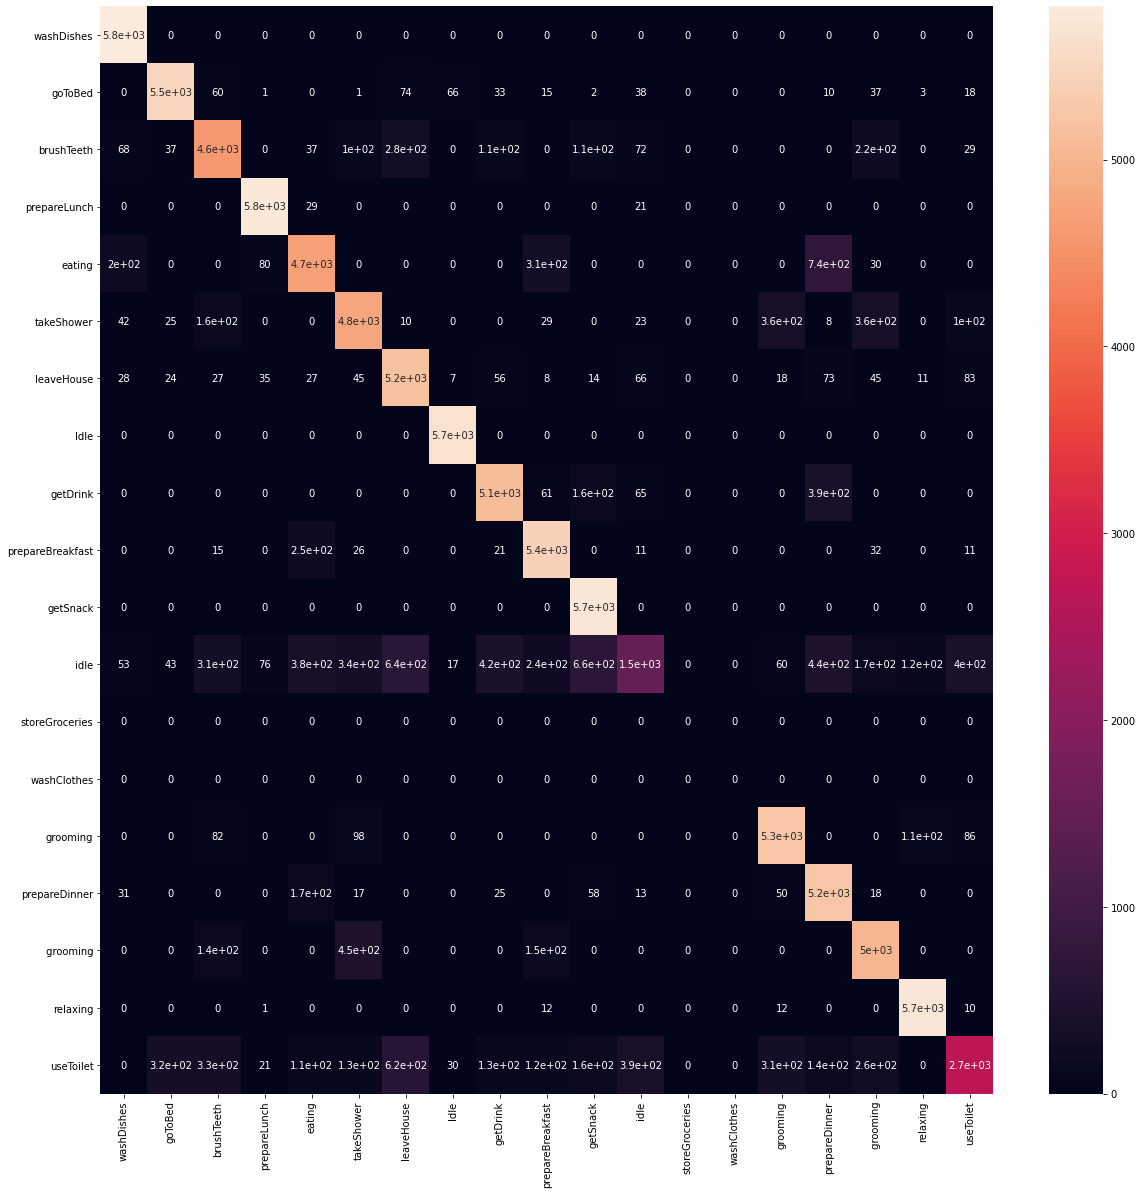

In [44]:
plt.figure(figsize=(20, 20))
sn.heatmap(df_cm_train, annot=True)
# plt.show()
plt.savefig('train_Cf_matrix_allHouse_OneDayValidationFromEachHouse')




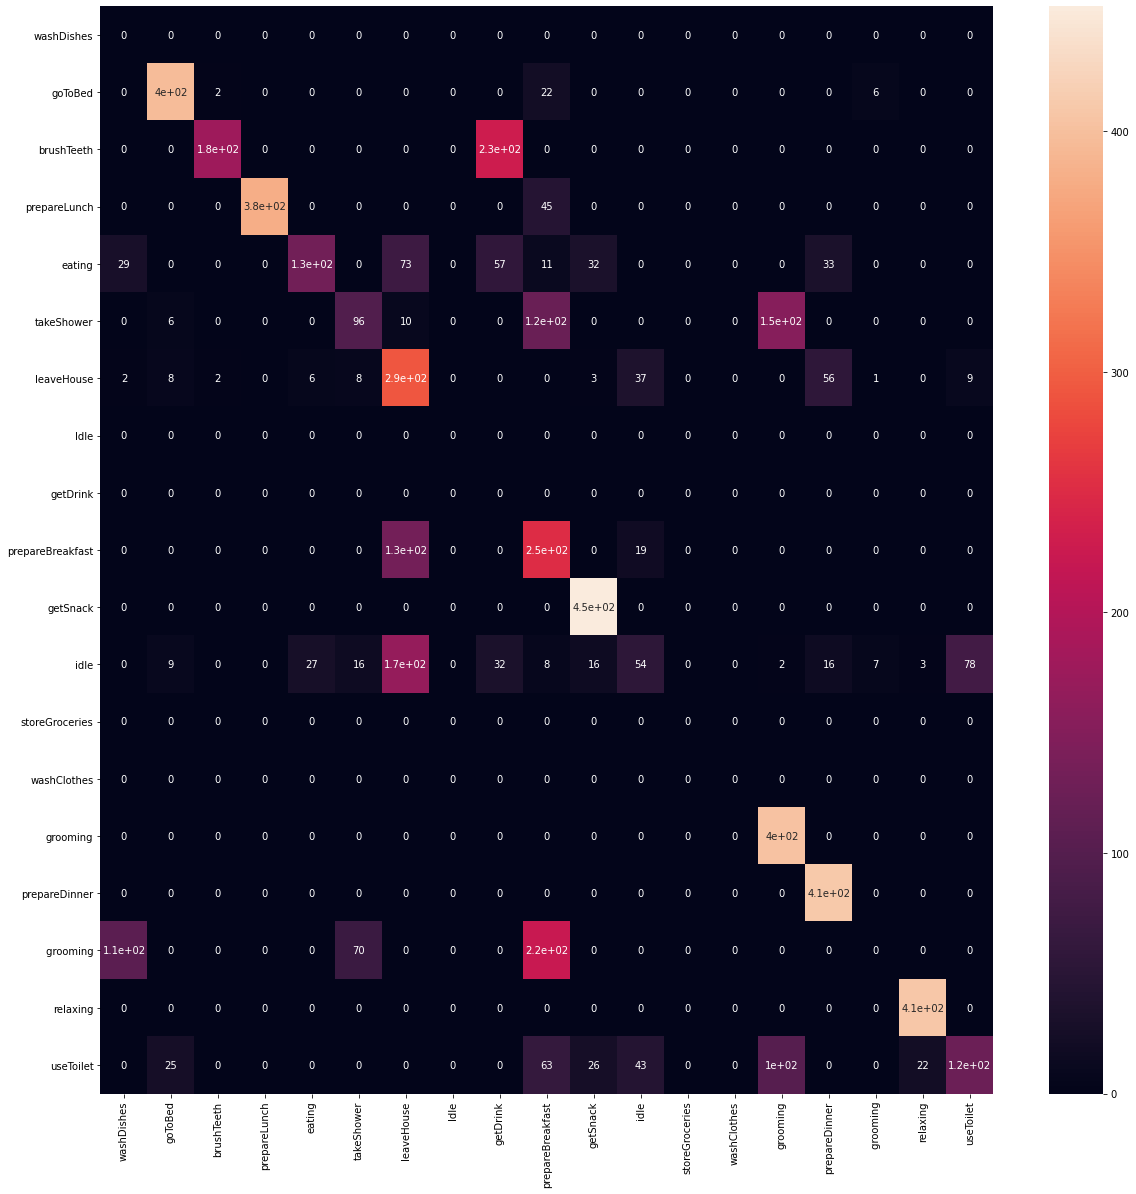

In [46]:
plt.figure(figsize=(20, 20))
sn.heatmap(df_cm_test, annot=True)
# plt.show()
plt.savefig('test_Cf_matrix_allHouse_OneDayValidationFromEachHouse')


In [30]:
total_ids = np.arange(len(labels), dtype=int)
valid_idx = []
valid_idx.extend(total_ids[7183: 8622])
valid_idx.extend(total_ids[37088+4756: 37088+6195])
valid_idx.extend(total_ids[37088 + 20583 + 17353:  37088 + 20583 + 18792])
valid_idx.extend(total_ids[37088 + 20583 + 26488 +11375 : 37088 + 20583 + 26488 +12814])

In [37]:
train_idx = list(set(total_ids) -  set(valid_idx))

### Make config values from csv

In [133]:
import time
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import json





def makeConfigDictionary(labels):
    config = {}
    dictList = []
    for i, name in enumerate(labels):
        d ={}               
        d['id'] = i
        d['name'] = name
        dictList.append(d)
    config['ActivityIdList'] =  dictList
    return config


def makeMasterDictfromJSON(json):
    full_list = []
    sensor_dict = {}
    for x in json['sensors']:
        cur_list = []
        name = {}
        type_ = {}
        name['name'] = x['name'] + '_' + str(x['id'])
        type_['type'] = x['type']
        cur_list.append(name)
        cur_list.append(type_)
        sensor_dict[x['name'].split('_')[0]] = cur_list
    return sensor_dict


def getClassIdFromname(name):        
    ActivityIdList = config['ActivityIdList']
    train_label = [x for x in ActivityIdList  if x["name"] == name]    
    return train_label[0]['id']

# Take 10 percent of your data

def makeConfigDictionary(labels):
    config = {}
    dictList = []
    for i, name in enumerate(labels):
        d ={}               
        d['id'] = i
        d['name'] = name
        dictList.append(d)
    config['ActivityIdList'] =  dictList
    return config


# house = pd.read_csv('../../data/houseA/houseA.csv')
# json_file_path = '../../data/houseA/houseA.json'
json_file_path = '../../data/ordonezA/ordonezA.json'

with open(json_file_path) as f:
    json_file = json.load(f)
    config = makeMasterDictfromJSON(json_file)

# label = np.unique(house['activity'].values)

# config = makeConfigDictionary(label)
print("{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in config.items()) + "}")

#     print(json.dumps(config))   

{'BedPressureBedroom': [{'name': 'BedPressureBedroom_1'}, {'type': 'PressureSensor'}],
'CabinetMagneticBathroom': [{'name': 'CabinetMagneticBathroom_2'}, {'type': 'CupboardSensor'}],
'BasinPIRBathroom': [{'name': 'BasinPIRBathroom_3'}, {'type': 'MovementSensor'}],
'ToiletFlushBathroom': [{'name': 'ToiletFlushBathroom_4'}, {'type': 'FlushSensor'}],
'ShowerPIRBathroom': [{'name': 'ShowerPIRBathroom_5'}, {'type': 'MovementSensor'}],
'FridgeMagneticKitchen': [{'name': 'FridgeMagneticKitchen_6'}, {'type': 'CupboardSensor'}],
'CupboardMagneticKitchen': [{'name': 'CupboardMagneticKitchen_7'}, {'type': 'CupboardSensor'}],
'ToasterElectricKitchen': [{'name': 'ToasterElectricKitchen_8'}, {'type': 'ApplianceStatusSensor'}],
'CooktopPIRKitchen': [{'name': 'CooktopPIRKitchen_9'}, {'type': 'MovementSensor'}],
'MicrowaveElectricKitchen': [{'name': 'MicrowaveElectricKitchen_10'}, {'type': 'ApplianceStatusSensor'}],
'SeatPressureLiving': [{'name': 'SeatPressureLiving_11'}, {'type': 'PressureSensor'}],


# Making T-SNE Plot using house CSV and also using graph embeddings

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [2]:
def getClassnameFromID(train_label):    
    ActivityIdList = config['ActivityIdList']
    train_label = [x for x in ActivityIdList if x["id"] == int(train_label)]
    return train_label[0]['name']


In [3]:
house = pd.read_csv('../../data/all_houses/graph_embeddings_train.csv')

house_columns = house.columns
norm = MinMaxScaler().fit(house.iloc[:, :-1])
house.iloc[:, :-1] = norm.transform(house.iloc[:, :-1])


#!/usr/bin/env python
config = {
"learning_rate" : 0.0001,
"num_epochs" : 150,
"decay" : 1e-5,
"input_dim" : 48,
"hidden_dim" : 64,
"layer_dim" : 1,
"output_dim" : 16,
"seq_dim" : 2,
"batch_size" :8,
"split_ratio" : 0.5,
"num_workers":4,
"accumulation_steps": 1,
"no_of_subset":30 ,
"subset_overlap_length": 2 ,
"resize_width": 120,
"resize_height": 97,
"image_width": 663,
"image_height": 446,
"ActivityIdList":
         [{'name': 'washDishes', 'id': 0},
         {'name': 'goToBed', 'id': 1},
         {'name': 'brushTeeth', 'id': 2},
         {'name': 'prepareLunch', 'id': 3},
         {'name': 'eating', 'id': 4},
         {'name': 'takeShower', 'id': 5},
         {'name': 'leaveHouse', 'id': 6},
         {'name': 'getDrink', 'id': 7},
         {'name': 'prepareBreakfast', 'id': 8},
         {'name': 'getSnack', 'id': 9},
         {'name': 'idle', 'id': 10},
         {'name': 'grooming', 'id': 11},
         {'name': 'prepareDinner', 'id': 12},        
         {'name': 'relaxing', 'id': 13},
         {'name': 'useToilet', 'id': 14}],

"merging_activties" : {
        "loadDishwasher": "washDishes",
        "unloadDishwasher": "washDishes",
        "loadWashingmachine": "washClothes",
        "unloadWashingmachine": "washClothes",
        "receiveGuest": "relaxing",
        "eatDinner": "eating",
        "eatBreakfast": "eating",
        "getDressed": "grooming",
        "shave": "grooming",
        "takeMedication": "idle",
        "leave_Home": "leaveHouse",
        "Sleeping": "goToBed",
        "Bed_to_Toilet": "useToilet",
        "Enter_Home": "idle",
        "Respirate": "relaxing",
        "Work": "idle",
        "Housekeeping": "idle",
        "Idle": "idle",
        "watchTV": "relaxing"
    },
 "ob_representation": False,
 "leaveOneHouseOut": True
}



In [4]:
house.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,activity
0,0.000583,0.033956,0.042003,0.012645,0.223259,0.049338,0.042997,0.100614,0.123941,0.593154,...,0.043772,0.877686,0.060738,0.029115,0.057482,0.086204,0.008134,0.0,0.017140,13
1,0.000610,0.034173,0.042013,0.012537,0.225861,0.044786,0.043070,0.100004,0.123534,0.594748,...,0.043761,0.879169,0.060892,0.029508,0.057802,0.086467,0.009289,0.0,0.017113,13
2,0.000638,0.029218,0.042023,0.003693,0.329773,0.040778,0.060330,0.137803,0.158275,0.662195,...,0.043750,0.940460,0.061046,0.015241,0.079296,0.087104,0.003359,0.0,0.022962,10
3,0.000666,0.033882,0.042032,0.003556,0.351980,0.078440,0.043217,0.105154,0.157983,0.611832,...,0.043739,0.871191,0.061200,0.029757,0.080383,0.086045,0.009230,0.0,0.022941,13
4,0.001165,0.031032,0.042208,0.010246,0.217967,0.059586,0.044448,0.095280,0.115064,0.612142,...,0.043545,0.883453,0.061982,0.032745,0.053891,0.082466,0.008113,0.0,0.016403,13


In [5]:
house = pd.DataFrame(house)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn.manifold import TSNE


df_labels = [x for x in house.loc[-1: , 'activity'].values]
activity_index_list = []
activity_index= []

num_classes = 15
for i in range(num_classes):
    activity_index = house[house['activity'] == i].index.values
    activity_index_list.append(activity_index)

In [7]:

# df = house[house['activity'] == getClassnameFromID(i)]    
# Do not include start, end, activity..
house = house.iloc[:, 0:-1]    

time_start = time.time()
tsne = TSNE(n_iter=400)
tsne_results = tsne.fit_transform(house.values)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 19.392115831375122 seconds


In [11]:
df_labels =  np.array(df_labels)

In [18]:
houseA = pd.read_csv('../../data/houseA/ob_houseA.csv')
houseB = pd.read_csv('../../data/houseB/ob_houseB.csv')
houseC = pd.read_csv('../../data/houseC/ob_houseC.csv')
ordonezA = pd.read_csv('../../data/ordonezA/ob_ordonezA.csv')
ordonezB = pd.read_csv('../../data/ordonezB/ob_ordonezB.csv')
start = []
end = []
# Graph embedding order
# 'houseA', 'houseB', 'houseC', 'ordonezA'

allHouseList = [len(ordonezB), len(houseB), len(houseC), len(houseA), len(ordonezA)]


uniqueIndex = []
for i, houseDatasetLength in enumerate(allHouseList):
    if i == 0:
        start.append(0)
        end.append(sum(allHouseList[:i + 1]))
#         uniqueIndex.append((0, sum(allHouseList[:i + 1])))
    else:
        start.append((sum(allHouseList[:i])))
        end.append(sum(allHouseList[:i + 1]))
#         uniqueIndex.append((sum(allHouseList[:i]), sum(allHouseList[:i + 1])))

In [19]:
# start, end

/home/harsh/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Legend does not support [] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


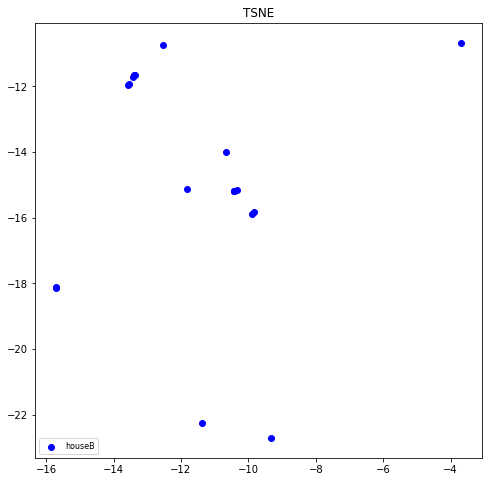

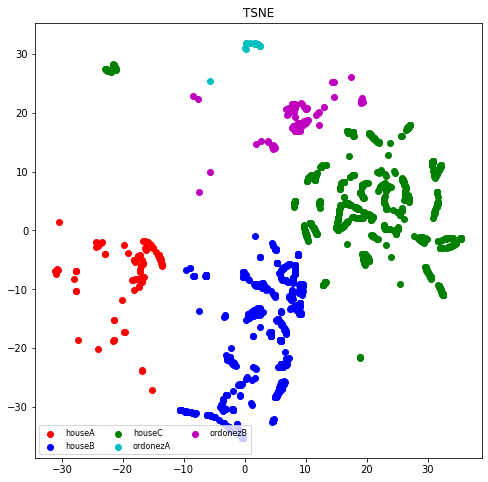

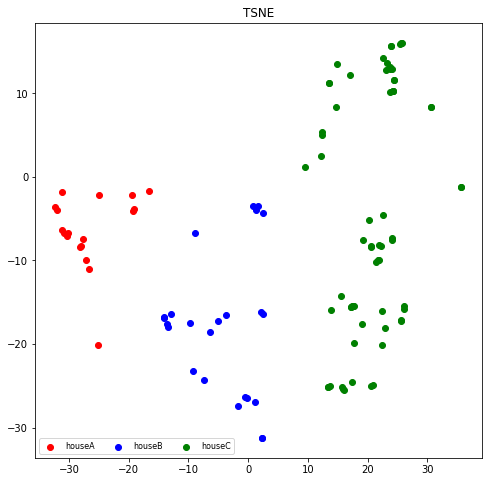

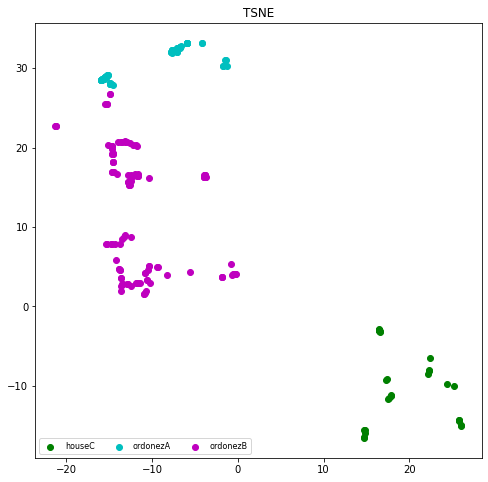

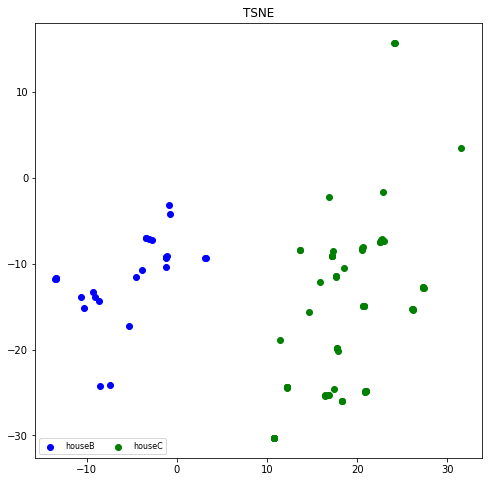

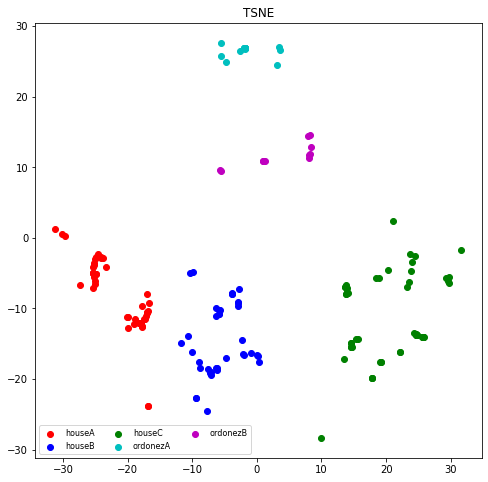

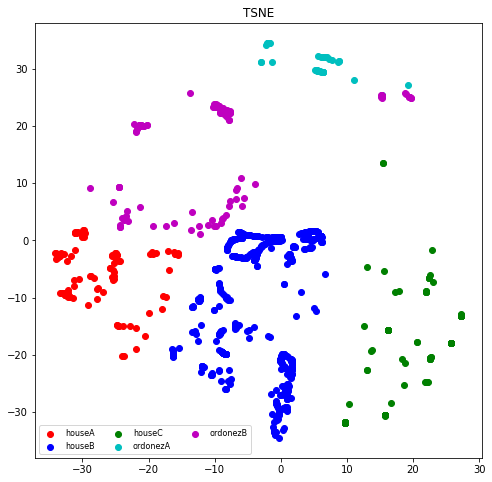

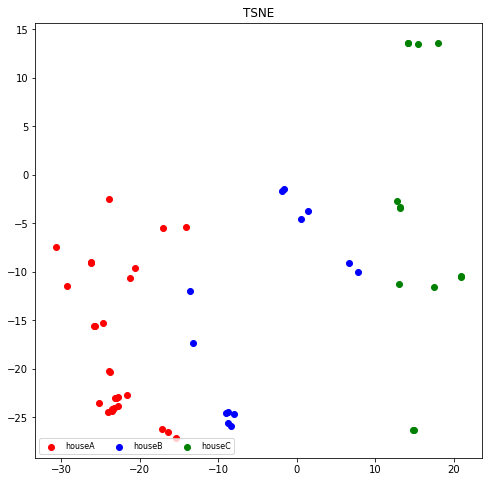

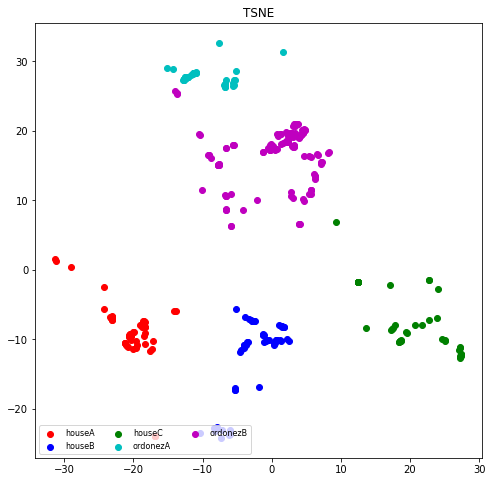

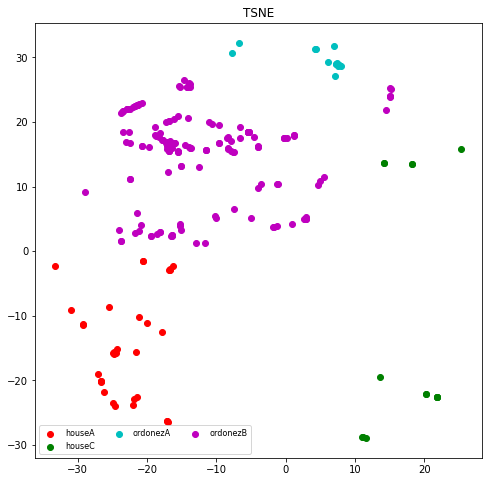

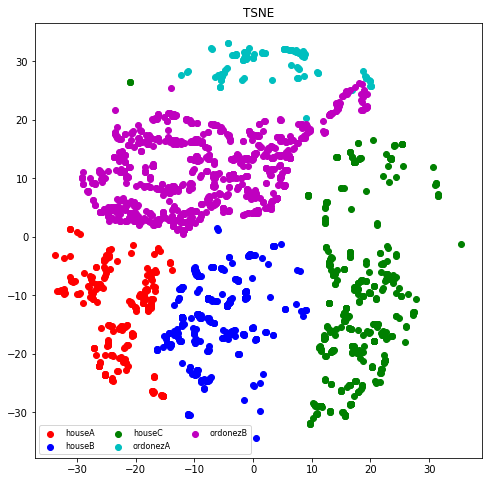

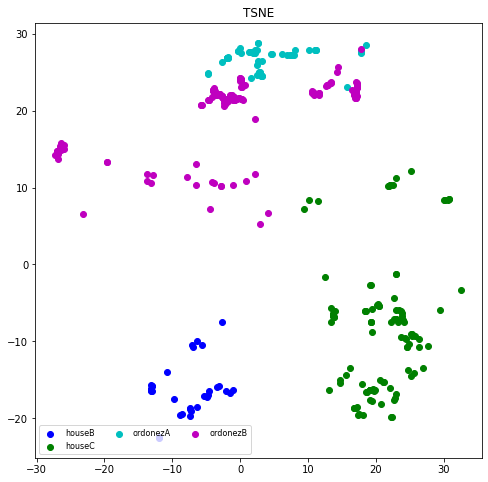

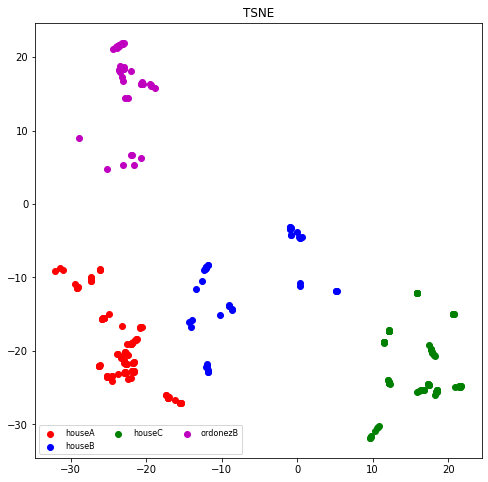

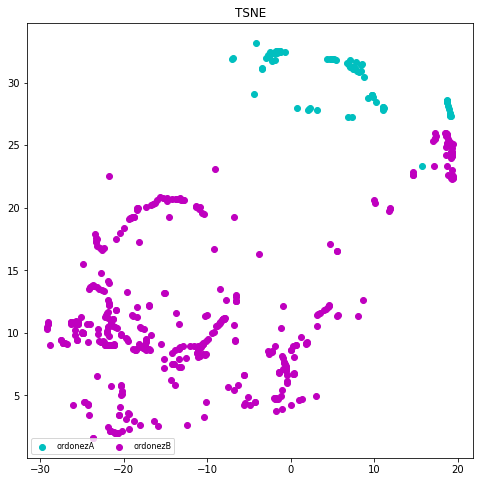

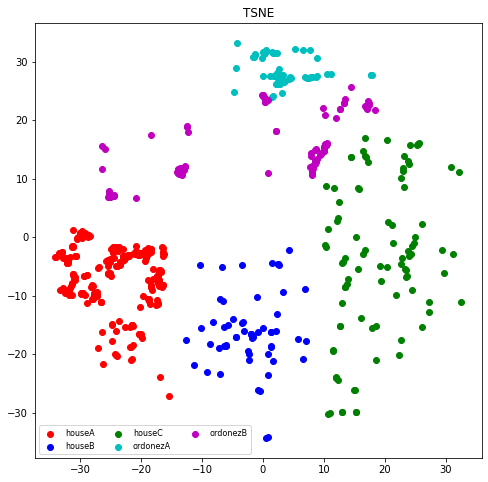

In [24]:
# Get index of each class and use only those index while plotting.
for i in range(num_classes):    
    # Create the figure
    fig = plt.figure( figsize=(8,8) )
    ax = fig.add_subplot(1, 1, 1, title='TSNE')
    
    houseA, houseB, houseC, ordonezA, ordonezB = [],[],[],[],[]
    
    # Create the scatter
    for j in activity_index_list[i]:
        if start[0] < j < end[0]:
            ordonezB.append(j)
        elif start[1] < j < end[1]:
            houseB.append(j)
        elif start[2] < j < end[2]:
            houseC.append(j)
        elif start[3] < j < end[3]:
            houseA.append(j)
        elif start[4] < j < end[4]:
            ordonezA.append(j)
              
    
    if houseA:
        houseA = ax.scatter(x=tsne_results[houseA,0], 
                   y=tsne_results[houseA,1],
                   color='r')
    if houseB:
        houseB = ax.scatter(x=tsne_results[houseB,0], 
                   y=tsne_results[houseB,1],
                   color='b')
    if houseC:
        houseC = ax.scatter(x=tsne_results[houseC,0], 
                   y=tsne_results[houseC,1],
                   color='g')
    if ordonezA:
        ordonezA = ax.scatter(x=tsne_results[ordonezA,0], 
                   y=tsne_results[ordonezA,1],
               color='c')
    if ordonezB:
        ordonezB = ax.scatter(x=tsne_results[ordonezB,0], 
               y=tsne_results[ordonezB,1],
               color='m')

    plt.legend((houseA, houseB, houseC, ordonezA, ordonezB),
       ('houseA', 'houseB', 'houseC', 'ordonezA', 'ordonezB'),
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)
    
    axes = plt.gca()
    
#     axes.set_xlim(np.min(tsne_results[activity_index_list[i],0]) ,  np.max(tsne_results[activity_index_list[i],0]) )
#     axes.set_ylim( np.min(tsne_results[activity_index_list[i],1]) ,  np.max(tsne_results[activity_index_list[i],1]) )
    plt.savefig('./images/all_house/graph_embedding/graph_Embeddings_Train_TSNE_'+ getClassnameFromID(i))        

### Above process for master.csv

In [27]:
# Master
house = pd.read_csv('../../data/master/ob_master.csv')

In [28]:
#master

import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn.manifold import TSNE


df_labels = [x for x in house.loc[-1: , 'activity'].values]
activity_index_list = []
activity_index= []

num_classes = 15
for i in range(num_classes):    
    activity_index = house[house['activity'] == getClassnameFromID(i)].index.values
    activity_index_list.append(activity_index)

In [29]:
# Master

# df = house[house['activity'] == getClassnameFromID(i)]    
# Do not include start, end, activity..
house = house.iloc[:, 4:]    

time_start = time.time()
tsne = TSNE(n_iter=400)
tsne_results = tsne.fit_transform(house.values)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 18.583476781845093 seconds


In [52]:
houseA = pd.read_csv('../../data/houseA/houseA.csv')
houseB = pd.read_csv('../../data/houseB/houseB.csv')
houseC = pd.read_csv('../../data/houseC/houseC.csv')
ordonezA = pd.read_csv('../../data/ordonezA/ordonezA.csv')
ordonezB = pd.read_csv('../../data/ordonezB/ordonezB.csv')
start = []
end = []
# Graph embedding order
# 'houseA', 'houseB', 'houseC', 'ordonezA'
# allHouseList = [len(houseA), len(houseB),len(houseC), len(ordonezA)]
# 
#master
allHouseList =  [len(ordonezB), len(houseB), len(houseC),len(houseA), len(ordonezA)]

uniqueIndex = []

for i, houseDatasetLength in enumerate(allHouseList):
    if i == 0:
        start.append(0)
        end.append(sum(allHouseList[:i + 1]))
#         uniqueIndex.append((0, sum(allHouseList[:i + 1])))
    else:
        start.append((sum(allHouseList[:i])))
        end.append(sum(allHouseList[:i + 1]))
#         uniqueIndex.append((sum(allHouseList[:i]), sum(allHouseList[:i + 1])))

/home/harsh/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Legend does not support [] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


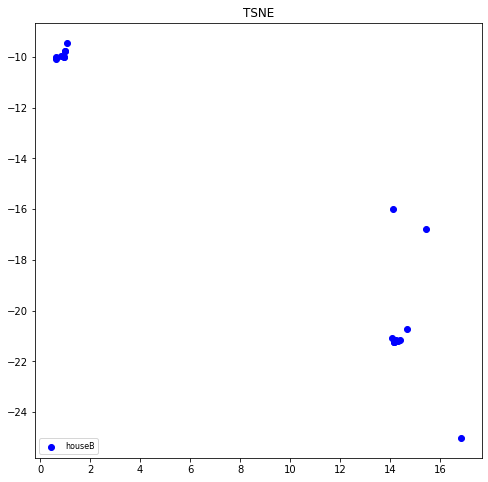

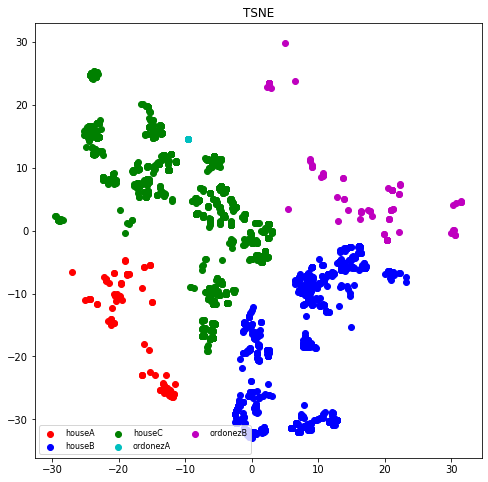

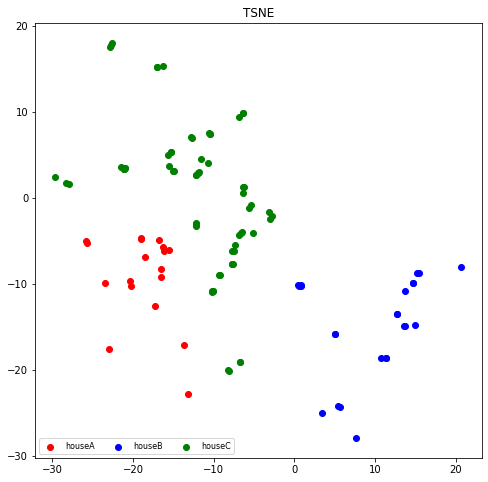

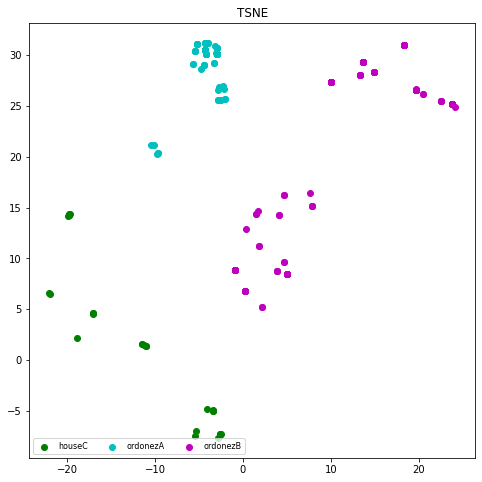

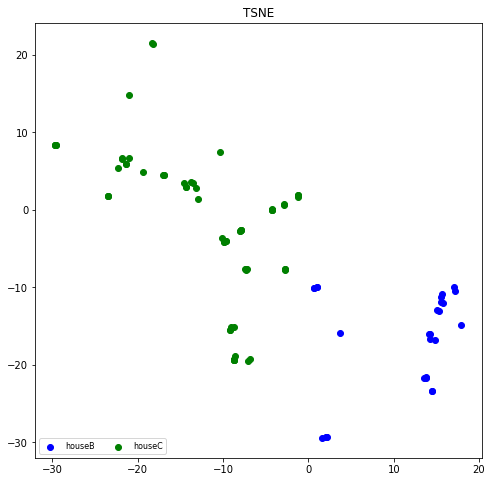

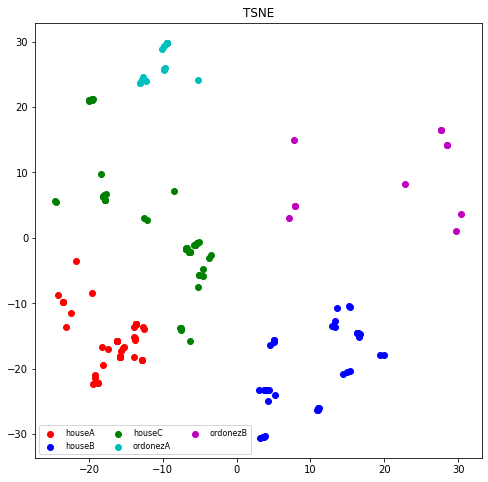

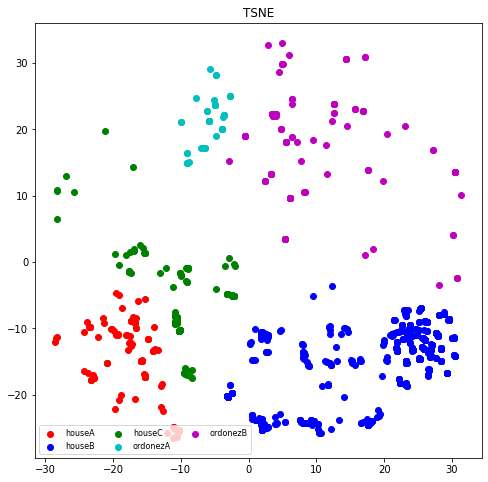

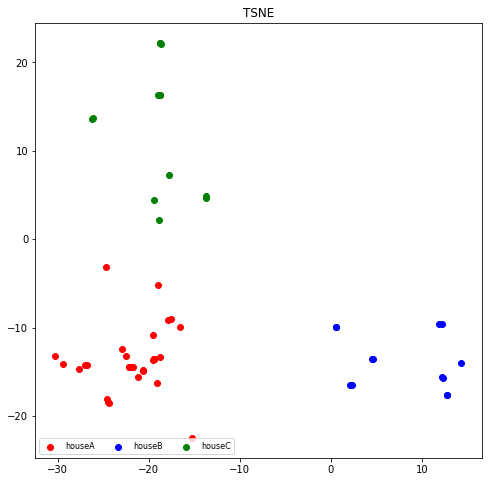

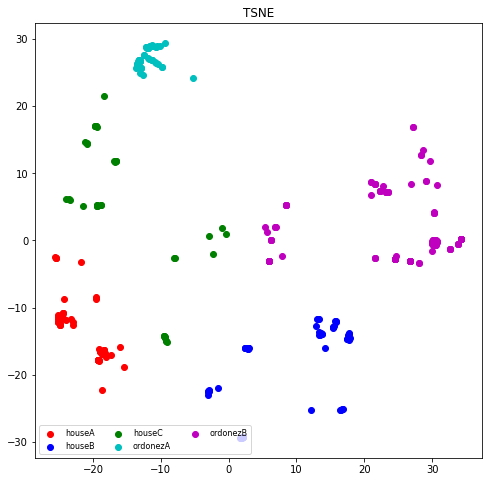

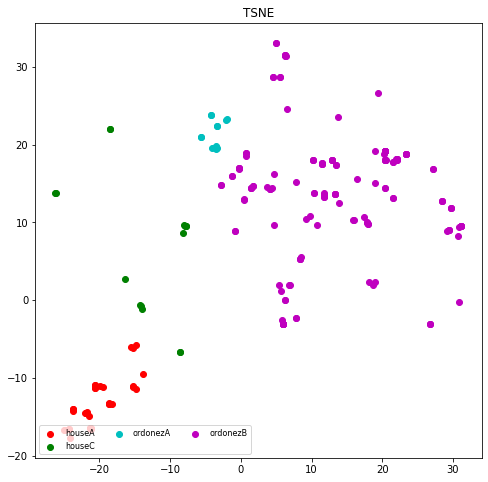

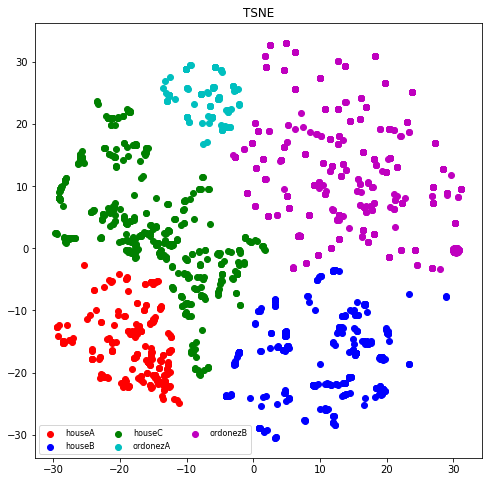

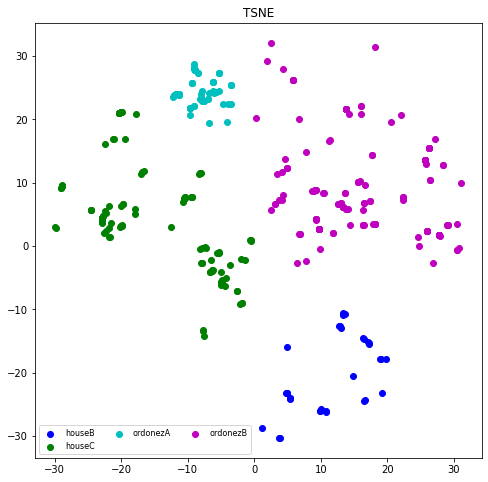

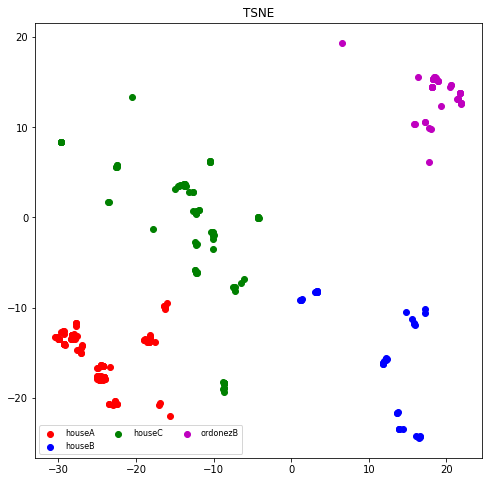

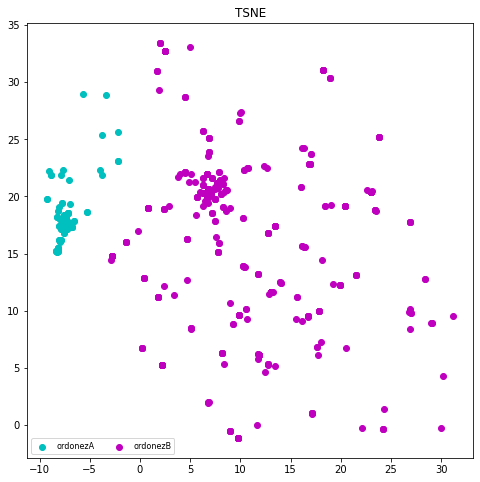

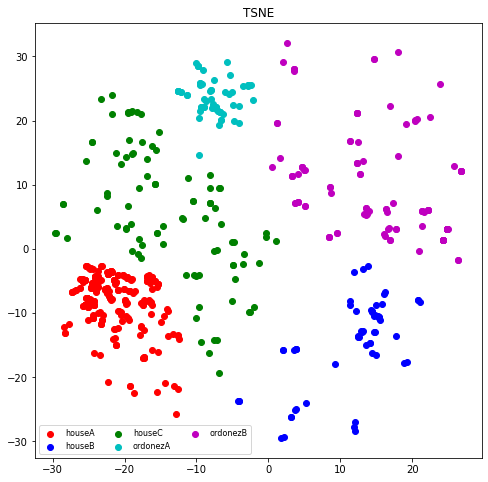

In [30]:
# Get index of each class and use only those index while plotting.
for i in range(num_classes):    
    # Create the figure
    fig = plt.figure( figsize=(8,8) )
    ax = fig.add_subplot(1, 1, 1, title='TSNE')
    
    houseA, houseB, houseC, ordonezA, ordonezB = [],[],[],[],[]
    
    # Create the scatter
    for j in activity_index_list[i]:
        if start[0] < j < end[0]:
            ordonezB.append(j)
        elif start[1] < j < end[1]:
            houseB.append(j)
        elif start[2] < j < end[2]:
            houseC.append(j)    
        elif start[3] < j < end[3]:
            houseA.append(j)      
        elif start[4] < j < end[4]:
            ordonezA.append(j)
              
    
    
    if houseA:
        houseA = ax.scatter(x=tsne_results[houseA,0], 
                   y=tsne_results[houseA,1],
                   color='r')
    if houseB:
        houseB = ax.scatter(x=tsne_results[houseB,0], 
                   y=tsne_results[houseB,1],
                   color='b')
    if houseC:
        houseC = ax.scatter(x=tsne_results[houseC,0], 
                   y=tsne_results[houseC,1],
                   color='g')
    if ordonezA:
        ordonezA = ax.scatter(x=tsne_results[ordonezA,0], 
                   y=tsne_results[ordonezA,1],
               color='c')
    if ordonezB:
        ordonezB = ax.scatter(x=tsne_results[ordonezB,0], 
               y=tsne_results[ordonezB,1],
               color='m')

    plt.legend((houseA, houseB, houseC, ordonezA, ordonezB),
       ('houseA', 'houseB', 'houseC', 'ordonezA', 'ordonezB'),
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)
    axes = plt.gca()
    
#     axes.set_xlim(np.min(tsne_results[activity_index_list[i],0]) ,  np.max(tsne_results[activity_index_list[i],0]) )
#     axes.set_ylim( np.min(tsne_results[activity_index_list[i],1]) ,  np.max(tsne_results[activity_index_list[i],1]) )
    plt.savefig('./images/all_house/master/master_'+ getClassnameFromID(i))            

## T-SNE for mnist Using procedure as above, just to check. Seems correct

In [187]:
import torchvision.datasets as dset

In [191]:
train_set = dset.MNIST('./',train=True,  download=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/home/harsh/anaconda3/envs/ds/lib/python3.7/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
data_loader = torch.utils.data.DataLoader(
  
  datasets.MNIST('./', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.5,), (0.5,))

In [196]:
x_train = []
y_train = []
for i in range(len(train_set)):
    x, y = train_set[i]
    x_train.append(x)
    y_train.append(y)

In [206]:
X = np.zeros((len(x_train), 784))

In [207]:
for i in range(len(train_set)):
    data = np.asarray(x_train[i], dtype="int32")

    X[i] = data.flatten()
    
X = pd.DataFrame(X)


In [208]:
X.shape


(60000, 784)

In [209]:
Y = pd.DataFrame(y_train)

In [210]:
Y.head()

,0
0,5
1,0
2,4
3,1
4,9


In [211]:
X = X.sample(frac=0.1, random_state=10).reset_index(drop=True)
Y = Y.sample(frac=0.1, random_state=10).reset_index(drop=True)
df = X


In [212]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 132.3494770526886 seconds


In [213]:
df['label'] = Y

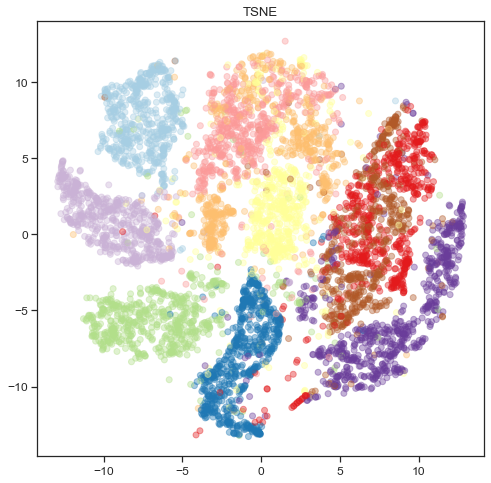

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=df['label'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.savefig('./images/MNIST_TSNE')

# config

In [61]:
#!/usr/bin/env python
config = {
"learning_rate" : 0.0001,
"num_epochs" : 150,
"decay" : 1e-5,
"input_dim" : 79,
"hidden_dim" : 64,
"layer_dim" : 1,
"output_dim" : 16,
"seq_dim" : 2,
"batch_size" :8,
"split_ratio" : 0.5,
"num_workers":4,
"accumulation_steps": 1,
"no_of_subset":30 ,
"subset_overlap_length": 2 ,
"resize_width": 120,
"resize_height": 97,
"image_width": 663,
"image_height": 446,
"ActivityIdList":
         [{'name': 'washDishes', 'id': 0},
         {'name': 'goToBed', 'id': 1},
         {'name': 'brushTeeth', 'id': 2},
         {'name': 'prepareLunch', 'id': 3},
         {'name': 'eating', 'id': 4},
         {'name': 'takeShower', 'id': 5},
         {'name': 'leaveHouse', 'id': 6},
         {'name': 'getDrink', 'id': 7},
         {'name': 'prepareBreakfast', 'id': 8},
         {'name': 'getSnack', 'id': 9},
         {'name': 'idle', 'id': 10},
         {'name': 'grooming', 'id': 11},
         {'name': 'prepareDinner', 'id': 12},
         {'name': ' grooming', 'id': 13},
         {'name': 'relaxing', 'id': 14},
         {'name': 'useToilet', 'id': 15}],

"merging_activties" : {
        "loadDishwasher": "washDishes",
        "unloadDishwasher": "washDishes",
        "loadWashingmachine": "washClothes",
        "unloadWashingmachine": "washClothes",
        "receiveGuest": "relaxing",
        "eatDinner": "eating",
        "eatBreakfast": "eating",
        "getDressed": " grooming",
        "shave": "grooming",
        "takeMedication": "idle",
        "leave_Home": "leaveHouse",
        "Sleeping": "goToBed",
        "Bed_to_Toilet": "useToilet",
        "Enter_Home": "idle",
        "Respirate": "relaxing",
        "Work": "idle",
        "Housekeeping": "idle",
        "Idle": "idle",
        "watchTV": "relaxing"
    },
 "ob_representation": True
}

# Making Sensor change time CSV. Which tells for each sensor the time it was last changed

In [215]:
import dgl
import numpy as np
import torch
import pandas as pd
import json
from torch.utils.data import DataLoader
import torch.nn as nn
import dgl.nn.pytorch as dglnn
import torch.nn.functional as F
import os
from sklearn.preprocessing import MinMaxScaler

Using backend: pytorch


In [216]:
file_names = ['houseA', 'houseB', 'houseC', 'ordonezA', 'ordonezB']
for file_name in file_names:
    print(file_name)
    csv_file = os.path.join('../../data/', file_name, 'ob_' + file_name + '.csv')
    house = pd.read_csv(csv_file)
    if 'time_of_the_day' not in house:
        df_time = pd.to_datetime(house['start'])
        df_time = (df_time.dt.hour*60+df_time.dt.minute)*60 + df_time.dt.second
        df_time/= 24 * 60 * 60
        house['time_of_the_day'] = df_time
        house.to_csv(csv_file, index=False)
        
    sensorTime = house.copy()

    ### Creating Sensor Timings CSV


    length_of_sensor_columns = len(house.iloc[0, 4:])
    print(length_of_sensor_columns)

    prev_value_of_sensor_row_list = np.zeros(length_of_sensor_columns, dtype=int)
    for i in range(1,len(house)):        
        for j in range(length_of_sensor_columns):        
            prev_sensor_value = house.iloc[prev_value_of_sensor_row_list[j], 4+j]
            current_sensor_value = house.iloc[i, 4+j]

            prev_sensor_time_of_day = house.loc[prev_value_of_sensor_row_list[j], 'time_of_the_day']        
            curr_sensor_time_of_day = house.loc[i, 'time_of_the_day']
            diff = abs(curr_sensor_time_of_day - prev_sensor_time_of_day) * 24    
            sensorTime.iloc[i, 4 + j] =  diff

            if prev_sensor_value != current_sensor_value:       
                prev_value_of_sensor_row_list[j] = i
                
    # Normalize each column value b/w 0 to 1
    
    sensorTimeTemp = sensorTime.copy()

#     house_columns = house.columns
    norm = MinMaxScaler().fit(sensorTime.iloc[:, 3:])
    sensorTime.iloc[:, 3:] = norm.transform(sensorTime.iloc[:, 3:])

#     lastCol = house_temp.iloc[:, -1]
#     house = pd.concat([pd.DataFrame(house), lastCol], axis = 1)
    
    sensorTime.to_csv(os.path.join('../../data/', file_name, 'house-sensorChangeTime.csv'), index = False)

houseA
46
houseB
54
houseC
55
ordonezA
44
ordonezB
44


### KL Divergence for selecting best validation days from each of 4 house( as per the master_ob.csv Index)

In [56]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
import datetime
from datetime import datetime
import collections

In [57]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [58]:
houseA = pd.read_csv('../../data/houseA/ob_houseA.csv')
houseB = pd.read_csv('../../data/houseB/ob_houseB.csv')
houseC = pd.read_csv('../../data/houseC/ob_houseC.csv')
ordonezA = pd.read_csv('../../data/ordonezA/ob_ordonezA.csv')
ordonezB = pd.read_csv('../../data/ordonezB/ob_ordonezB.csv')
masterOb =  pd.read_csv('../../data/master/ob_master.csv')
start = []
end = []
# Graph embedding order
# 'houseA', 'houseB', 'houseC', 'ordonezA'
allHouseList = [len(houseA), len(houseB),len(houseC), len(ordonezA)]

In [59]:
def getUniqueStartIndex(df1): 
    df = df1.copy()
    # this line converts the string object in Timestamp object
    if isinstance(df['start'][0], str):
        df['start'] = [datetime.strptime(d, '%d-%b-%Y %H:%M:%S') for d in df["start"]]
    # extracting date from timestamp
    if isinstance(df['start'][0], datetime):
        df['start'] = [datetime.date(d) for d in df['start']]
    s = df['start']
    return s[s.diff().dt.days != 0].index.values

In [60]:
FMT = '%d-%b-%Y %H:%M:%S'

house_list = [ordonezB, houseB ,houseC,houseA, ordonezA]

h_name_list = ['ordonezB', 'houseB', 'houseC', 'houseA', 'ordonezA']
house_start_end_dict = {}
for house_no, df in enumerate(house_list):
    uniqueIndex = getUniqueStartIndex(df)
    start_end_list = []
    kl_div = []
    individual_house_index_list = []

    house_dict = df['activity'].groupby(df['activity']).count().to_dict()

    for i in range(len(uniqueIndex) - 1):
        start, end  = uniqueIndex[i], uniqueIndex[i + 1]    
        testing_dict =  df['activity'].groupby(df[start:end]['activity']).count().to_dict()

        for key, value in house_dict.items():
            if key not in testing_dict:
                testing_dict[key] = 1

        testing_values = list(testing_dict.values())
        testing_total = end - start
        testing_distribution = testing_values/testing_total

        training_index = np.append(np.arange(0,start), np.arange(end, len(df['activity'])))
        training_dict =  df['activity'].groupby(df.iloc[training_index]['activity']).count().to_dict()

        for key, value in house_dict.items():            
            if key not in training_dict:
                training_dict[key] = 1

        training_values = list(training_dict.values())
        training_total = end - start
        training_distribution = training_values/training_total
        
        kl_div.append(kl_divergence(testing_distribution, training_distribution))
        
        individual_house_index_list.append((start, end))
        
        start = masterOb[masterOb['start'] == house_list[house_no].loc[start, 'start']].index.values[0]
        end = masterOb[masterOb['end'] == house_list[house_no].loc[end, 'end']].index.values[0]
        start_end_list.append((start, end))
    
        

    min_value_index = kl_div.index(min(kl_div))
    print(h_name_list[house_no])
    print('master_OB_ csv Index: ',start_end_list[min_value_index])
    print('Individual csv ob index',individual_house_index_list[min_value_index])
    print()
    house_start_end_dict[h_name_list[house_no]] = start_end_list[min_value_index]
    
    
print(house_start_end_dict)

ordonezB
master_OB_ csv Index:  (767, 892)
Individual csv ob index (767, 892)

houseB
master_OB_ csv Index:  (4015, 4033)
Individual csv ob index (1552, 1571)

houseC
master_OB_ csv Index:  (4610, 4619)
Individual csv ob index (0, 9)

houseA
master_OB_ csv Index:  (7228, 7241)
Individual csv ob index (300, 313)

ordonezA
master_OB_ csv Index:  (8403, 8427)
Individual csv ob index (439, 463)

{'ordonezB': (767, 892), 'houseB': (4015, 4033), 'houseC': (4610, 4619), 'houseA': (7228, 7241), 'ordonezA': (8403, 8427)}


## Decompressed Dictionary

In [54]:
houseA = pd.read_csv('../../data/houseA/houseA.csv')
houseB = pd.read_csv('../../data/houseB/houseB.csv')
houseC = pd.read_csv('../../data/houseC/houseC.csv')
ordonezA = pd.read_csv('../../data/ordonezA/ordonezA.csv')
ordonezB = pd.read_csv('../../data/ordonezB/ordonezB.csv')
allHouseList = [len(ordonezB), len(houseB), len(houseC), len(houseA), len(ordonezA)]
house_list = [ordonezB, houseB, houseC, houseA, ordonezA]
house_name_list = ['ordonezB', 'houseB', 'houseC', 'houseA', 'ordonezA']
Decompressed_start_end_dict = {}

for i, name in enumerate(house_name_list):
    if i == 0:
        # start and end of compressed csv
        start = 0
        end = sum(allHouseList[:i + 1])
    else:
        # start and end of compressed csv
        start = sum(allHouseList[:i])
        end = sum(allHouseList[:i + 1])
        

    Decompressed_start_end_dict[name] = (start, end)

Decompressed_start_end_dict

{'ordonezB': (0, 30470),
 'houseB': (30470, 51052),
 'houseC': (51052, 77539),
 'houseA': (77539, 114626),
 'ordonezA': (114626, 134501)}

#  Pre processing for graph embeddings before giving it to masterCSV LSTM code

In [238]:
config =  [ {'name': 'washDishes', 'id': 0},
         {'name': 'goToBed', 'id': 1},
         {'name': 'brushTeeth', 'id': 2},
         {'name': 'prepareLunch', 'id': 3},
         {'name': 'eating', 'id': 4},
         {'name': 'takeShower', 'id': 5},
         {'name': 'leaveHouse', 'id': 6},
         {'name': 'getDrink', 'id': 7},
         {'name': 'prepareBreakfast', 'id': 8},
         {'name': 'getSnack', 'id': 9},
         {'name': 'idle', 'id': 10},
         {'name': 'grooming', 'id': 11},
         {'name': 'prepareDinner', 'id': 12},
         {'name': 'relaxing', 'id': 13},
         {'name': 'useToilet', 'id': 14}
        ]

d = {}

for dict_ in config:
    d[dict_['id']] = dict_['name']
    
print(d)

{0: 'washDishes', 1: 'goToBed', 2: 'brushTeeth', 3: 'prepareLunch', 4: 'eating', 5: 'takeShower', 6: 'leaveHouse', 7: 'getDrink', 8: 'prepareBreakfast', 9: 'getSnack', 10: 'idle', 11: 'grooming', 12: 'prepareDinner', 13: 'relaxing', 14: 'useToilet'}


In [239]:
master_seq_list = [188, 1, 1, 1, 18, 1, 2, 2, 2, 1, 62, 1, 1, 456, 1, 5, 2, 1, 2, 1, 4, 1, 1, 2, 1, 1, 1, 2, 1, 18, 1, 2, 3, 9, 2, 1, 1, 2, 4, 1, 1, 1, 4, 1, 16, 1, 1, 1, 2, 2, 9, 1, 1, 1, 1, 1, 7, 1, 1, 1, 2, 1, 3, 2, 1, 3, 1, 13, 1, 1, 19, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 4, 4, 8, 4, 7, 1, 12, 1, 1, 10, 1, 2, 1, 4, 4, 4, 1, 3, 1, 15, 1, 18, 1, 8, 2, 1, 1, 1, 1, 1, 27, 1, 1, 7, 1, 6, 1, 1, 1, 1, 1, 28, 1, 10, 1, 45, 1, 1, 1, 18, 1, 1, 4, 1, 7, 1, 1, 62, 1, 4, 1, 1, 2, 1, 3, 1, 1, 1, 114, 1, 1, 1, 6, 1, 4, 1, 2, 1, 1, 78, 1, 1, 1, 1, 15, 1, 1, 39, 1, 1, 1, 1, 1, 6, 1, 1, 100, 1, 1, 1, 442, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 2, 2, 5, 4, 4, 2, 3, 3, 1, 4, 1, 10, 1, 17, 1, 1, 1, 1, 34, 1, 2, 1, 168, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 2, 1, 1, 8, 1, 2, 1, 6, 1, 1, 4, 1, 5, 1, 1, 1, 1, 1, 67, 1, 12, 1, 1, 1, 1, 1, 24, 1, 1, 1, 55, 1, 1, 1, 1, 1, 1, 1, 18, 2, 24, 1, 1, 1, 23, 1, 2, 1, 21, 1, 29, 1, 2, 2, 1, 2, 1, 1, 185, 1, 1, 1, 16, 1, 4, 1, 11, 1, 2, 1, 1, 1, 1, 3, 1, 1, 35, 1, 5, 1, 1, 1, 282, 1, 2, 1, 225, 1, 2, 1, 1, 1, 1, 2, 7, 1, 2, 2, 1, 74, 1, 1, 1, 6, 1, 7, 1, 4, 1, 1, 1, 1, 3, 1, 1, 8, 1, 1, 1, 16, 1, 1, 8, 1, 1, 6, 3, 3, 1, 3, 4, 2, 1, 1, 9, 1, 2, 6, 1, 12, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 84, 1, 1, 1, 1, 1, 2, 1, 79, 1, 1, 3, 1, 3, 1, 229, 1, 4, 2, 2, 3, 1, 1, 1, 7, 1, 1, 53, 2, 30, 1, 2, 2, 1, 1, 1, 1, 1, 1, 26, 1, 2, 1, 1, 47, 1, 1, 3, 1, 1, 53, 1, 1, 1, 1, 1, 28, 2, 2, 1, 70, 1, 1, 349, 1, 1, 5, 1, 1, 100, 1, 1, 1, 1, 4, 1, 2, 2, 1, 1, 2, 1, 1, 1, 3, 1, 7, 3, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1, 2, 54, 2, 1, 6, 1, 8, 2, 2, 1, 79, 1, 1, 2, 2, 1, 72, 1, 1, 1, 10, 1, 6, 1, 7, 1, 14, 1, 19, 1, 9, 1, 1, 5, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 255, 1, 1, 4, 2, 108, 1, 1, 14, 1, 3, 1, 1, 1, 1, 1, 1, 136, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 578, 1, 1, 1, 1, 2, 9, 1, 10, 4, 2, 4, 2, 3, 4, 1, 16, 1, 8, 1, 20, 1, 1, 42, 1, 1, 1, 1, 55, 1, 18, 1, 1, 6, 1, 1, 1, 1, 3, 1, 1, 1, 19, 2, 4, 1, 1, 9, 2, 1, 1, 1, 1, 5, 1, 1, 165, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 119, 1, 1, 1, 5, 9, 1, 63, 1, 23, 2, 6, 1, 1, 6, 1, 240, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 430, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 9, 1, 3, 1, 4, 3, 6, 2, 1, 5, 2, 2, 1, 86, 1, 1, 3, 1, 6, 2, 5, 1, 1, 9, 1, 1, 82, 1, 1, 21, 1, 1, 5, 1, 1, 2, 1, 101, 1, 1, 4, 1, 1, 1, 55, 1, 1, 1, 1, 3, 1, 1, 2, 1, 20, 1, 36, 1, 22, 1, 1, 36, 1, 1, 1, 1, 1, 43, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 21, 1, 1, 191, 1, 1, 2, 1, 3, 1, 54, 1, 4, 1, 437, 1, 1, 1, 5, 2, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 8, 10, 1, 4, 2, 1, 5, 1, 5, 1, 6, 1, 2, 1, 13, 1, 1, 5, 1, 1, 1, 1, 2, 1, 11, 1, 1, 3, 1, 220, 1, 2, 1, 1, 10, 1, 1, 1, 3, 3, 56, 1, 2, 1, 1, 1, 51, 1, 1, 21, 1, 5, 1, 4, 1, 2, 3, 1, 12, 2, 39, 1, 3, 2, 1, 1, 14, 1, 1, 1, 4, 46, 1, 3, 1, 4, 1, 2, 1, 1, 149, 1, 1, 1, 1, 2, 1, 5, 5, 3, 1, 16, 1, 1, 1, 1, 1, 1, 62, 1, 2, 1, 1, 1, 594, 1, 1, 1, 2, 1, 1, 3, 6, 1, 1, 7, 1, 1, 1, 51, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 5, 1, 1, 2, 6, 3, 2, 8, 2, 2, 1, 2, 5, 1, 4, 1, 4, 2, 1, 1, 1, 1, 1, 1, 105, 1, 1, 1, 1, 1, 80, 1, 1, 1, 1, 4, 5, 1, 1, 1, 1, 214, 1, 2, 2, 1, 1, 1, 4, 1, 1, 93, 1, 1, 27, 1, 1, 1, 1, 1, 1, 1, 2, 16, 1, 5, 1, 1, 1, 108, 1, 1, 1, 1, 57, 1, 2, 1, 1, 510, 1, 1, 1, 1, 1, 1, 11, 1, 1, 3, 2, 1, 2, 1, 5, 1, 2, 4, 1, 2, 9, 4, 6, 1, 1, 13, 1, 1, 1, 98, 1, 5, 2, 1, 2, 3, 1, 1, 4, 1, 4, 1, 7, 1, 4, 1, 4, 1, 31, 1, 13, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 17, 1, 1, 1, 13, 1, 30, 1, 1, 5, 2, 2, 1, 1, 1, 2, 1, 271, 1, 2, 1, 2, 1, 73, 1, 5, 1, 124, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 580, 1, 5, 1, 1, 1, 1, 3, 1, 1, 1, 82, 1, 3, 2, 8, 3, 1, 1, 3, 8, 1, 24, 1, 9, 1, 7, 1, 1, 41, 1, 1, 1, 1, 1, 3, 1, 5, 1, 1, 4, 1, 1, 9, 1, 1, 10, 1, 1, 49, 1, 1, 11, 1, 1, 6, 1, 1, 1, 7, 1, 20, 1, 1, 1, 1, 1, 111, 1, 1, 2, 1, 1, 1, 1, 69, 1, 6, 1, 1, 59, 1, 19, 1, 26, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 261, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 267, 1, 1, 1, 183, 41, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 2, 15, 1, 2, 1, 6, 1, 6, 1, 2, 1, 6, 1, 1, 1, 44, 1, 12, 1, 10, 12, 6, 1, 6, 1, 1, 18, 1, 11, 1, 97, 1, 1, 5, 1, 1, 1, 1, 1, 1, 18, 1, 1, 74, 1, 1, 7, 1, 1, 1, 80, 1, 1, 1, 1, 1, 1, 1, 121, 1, 1, 3, 1, 2, 1, 1, 1, 5, 1, 12, 1, 6, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 198, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 43, 1, 1, 1, 460, 25, 1, 3, 1, 1, 2, 1, 1, 3, 1, 5, 1, 1, 16, 1, 1, 9, 1, 3, 7, 4, 5, 1, 2, 1, 1, 1, 2, 1, 98, 1, 1, 1, 7, 1, 2, 1, 4, 1, 2, 1, 1, 5, 1, 1, 1, 52, 25, 1, 10, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 116, 1, 1, 4, 1, 1, 1, 13, 1, 45, 1, 1, 1, 1, 1, 4, 1, 1, 102, 1, 2, 1, 129, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 128, 2, 1, 5, 1, 2, 565, 1, 1, 1, 1, 1, 4, 1, 2, 1, 3, 2, 1, 53, 1, 2, 1, 1, 1, 1, 2, 1, 6, 1, 9, 7, 5, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 1, 13, 1, 1, 1, 4, 1, 1, 46, 1, 1, 7, 1, 2, 1, 6, 1, 2, 1, 8, 1, 1, 1, 1, 2, 1, 36, 1, 2, 1, 1, 81, 1, 1, 1, 1, 1, 1, 233, 1, 1, 3, 4, 1, 1, 1, 22, 1, 68, 1, 1, 1, 11, 1, 3, 2, 1, 2, 14, 1, 1, 1, 61, 1, 1, 1, 80, 1, 3, 1, 59, 1, 1, 1, 453, 1, 4, 2, 1, 1, 1, 4, 1, 4, 1, 1, 10, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 11, 1, 1, 18, 1, 1, 1, 1, 174, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 9, 38, 1, 1, 1, 1, 5, 3, 1, 1, 5, 1, 1, 1, 1, 46, 1, 1, 1, 6, 2, 1, 250, 1, 1, 1, 1, 2, 1, 105, 1, 7, 2, 2, 1, 1, 65, 1, 1, 1, 2, 1, 56, 1, 3, 1, 1, 60, 1, 1, 1, 1, 1, 435, 2, 1, 4, 1, 1, 44, 2, 1, 6, 2, 2, 1, 2, 1, 2, 4, 1, 3, 1, 19, 1, 5, 2, 1, 1, 4, 7, 3, 10, 4, 1, 1, 1, 2, 4, 1, 1, 1, 10, 1, 5, 1, 24, 1, 1, 1, 1, 1, 1, 22, 1, 1, 1, 2, 1, 18, 1, 1, 361, 1, 5, 2, 1, 5, 1, 1, 113, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 248, 1, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 508, 1, 5, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 57, 2, 3, 1, 3, 1, 1, 3, 1, 24, 1, 1, 1, 1, 55, 2, 1, 1, 1, 1, 4, 9, 13, 1, 2, 1, 5, 1, 6, 1, 23, 1, 2, 1, 1, 95, 1, 3, 1, 1, 1, 1, 1, 147, 1, 1, 1, 1, 1, 1, 14, 2, 24, 2, 6, 1, 1, 1, 1, 11, 60, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 264, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 442, 3, 1, 6, 2, 1, 1, 1, 1, 1, 13, 2, 1, 1, 2, 1, 7, 3, 2, 2, 2, 7, 1, 6, 1, 4, 1, 2, 1, 4, 1, 11, 1, 1, 2, 1, 1, 12, 1, 1, 82, 1, 1, 1, 1, 7, 1, 4, 1, 1, 12, 2, 4, 11, 1, 1, 1, 1, 1, 19, 1, 15, 1, 28, 1, 2, 1, 1, 1, 96, 1, 92, 1, 1, 6, 9, 1, 93, 1, 1, 3, 1, 1, 2, 1, 1, 5, 1, 2, 1, 145, 1, 1, 1, 1, 1, 1, 78, 1, 2, 1, 1, 1, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 57, 1, 1, 515, 1, 1, 1, 1, 2, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 6, 1, 6, 2, 1, 5, 1, 2, 2, 3, 1, 1, 3, 1, 2, 1, 173, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 17, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 37, 1, 1, 1, 1, 23, 1, 7, 2, 1, 1, 1, 5, 1, 1, 18, 1, 1, 1, 1, 3, 1, 1, 116, 1, 1, 1, 1, 1, 1, 1, 11, 1, 8, 1, 1, 1, 51, 1, 81, 1, 1, 1, 1, 30, 1, 1, 7, 1, 2, 15, 1, 1, 6, 1, 1, 1, 15, 1, 1, 68, 1, 1, 1, 2, 1, 33, 1, 3, 1, 13, 1, 66, 1, 1, 1, 358, 1, 2, 1, 96, 60, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 8, 1, 2, 19, 2, 16, 1, 3, 1, 1, 4, 1, 1, 8, 1, 5, 4, 1, 2, 1, 21, 1, 4, 11, 2, 6, 1, 2, 1, 1, 1, 99, 1, 10, 1, 21, 1, 8, 1, 1, 2, 129, 1, 11, 1, 3, 2, 1, 2, 1, 152, 1, 1, 1, 105, 1, 7, 2, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 84, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 561, 1, 5, 1, 1, 1, 1, 1, 18, 1, 2, 6, 1, 4, 1, 3, 2, 2, 2, 1, 3, 7, 1, 4, 3, 1, 1, 1, 20, 1, 4, 1, 1, 2, 1, 4, 1, 5, 1, 1, 18, 1, 5, 1, 12, 1, 1, 1, 32, 1, 2, 2, 6, 1, 19, 1, 16, 1, 32, 1, 1, 19, 1, 1, 3, 1, 1, 1, 1, 1, 26, 1, 1, 16, 2, 1, 2, 1, 1, 1, 1, 1, 13, 1, 1, 3, 1, 1, 53, 1, 1, 2, 1, 1, 94, 1, 1, 15, 1, 1, 1, 2, 1, 1, 1, 103, 1, 8, 1, 14, 1, 6, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 244, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 458, 1, 4, 1, 1, 49, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 12, 1, 20, 1, 11, 1, 1, 1, 5, 1, 3, 1, 1, 14, 2, 1, 1, 1, 1, 2, 1, 3, 2, 1, 13, 1, 4, 1, 1, 31, 1, 1, 5, 1, 17, 1, 12, 1, 2, 1, 21, 1, 2, 1, 20, 1, 1, 1, 12, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 16, 1, 1, 1, 1, 9, 1, 1, 4, 1, 2, 1, 3, 1, 64, 1, 11, 1, 1, 1, 1, 6, 1, 2, 1, 94, 1, 1, 1, 1, 1, 7, 1, 8, 1, 3, 1, 1, 3, 1, 1, 46, 1, 1, 4, 1, 11, 1, 6, 1, 1, 9, 1, 1, 1, 36, 1, 225, 1, 20, 1, 1, 3, 1, 1, 1, 15, 1, 1, 17, 1, 4, 1, 9, 3, 1, 5, 1, 2, 2, 2, 1, 1, 7, 1, 2, 1, 1, 12, 1, 4, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 1, 8, 2, 29, 1, 2, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 3, 1, 1, 1, 7, 1, 8, 2, 1, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 12, 2, 10, 1, 2, 1, 18, 26, 1, 1, 5, 1, 11, 1, 3, 11, 3, 1, 11, 2, 59, 1, 19, 2, 1, 1, 65, 3, 2, 42, 1, 1, 1, 2, 5, 1, 1, 2, 2, 1, 1, 2, 4, 1, 1, 3, 22, 2, 24, 1, 1, 2, 1, 2, 57, 1, 3, 19, 3, 9, 1, 13, 1, 1, 1, 1, 19, 1, 1, 1, 4, 1, 3, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 5, 8, 1, 1, 4, 1, 1, 1, 6, 2, 8, 1, 3, 1, 2, 2, 1, 7, 2, 14, 1, 2, 1, 2, 1, 3, 2, 12, 1, 1, 1, 12, 2, 1, 5, 1, 5, 1, 1, 1, 2, 1, 1, 6, 1, 8, 2, 2, 4, 1, 2, 1, 1, 3, 1, 11, 1, 3, 1, 1, 1, 6, 1, 2, 1, 1, 1, 5, 1, 2, 1, 2, 1, 1, 2, 1, 27, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 22, 1, 1, 1, 1, 4, 22, 1, 2, 10, 1, 2, 1, 9, 1, 6, 1, 8, 2, 6, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 8, 1, 3, 5, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 2, 1, 1, 5, 1, 1, 1, 34, 1, 6, 1, 1, 267, 133, 1, 335, 1, 1, 1, 1, 1, 1, 1, 245, 1, 16, 1, 252, 1, 1, 1, 1, 4, 2, 30, 2, 1, 41, 1, 2, 8, 18, 1, 3, 1, 1, 1, 1, 1, 1, 7, 2, 3, 19, 1, 54, 1, 7, 1, 1, 2, 1, 1, 2, 1, 1, 20, 1, 1, 356, 1, 7, 6, 3, 1, 6, 2, 1, 1, 9, 1, 91, 1, 20, 1, 6, 1, 72, 1, 19, 1, 21, 4, 32, 1, 35, 3, 11, 2, 41, 1, 1, 2, 1, 1, 6, 1, 2, 1, 3, 1, 67, 1, 33, 1, 75, 1, 35, 1, 11, 1, 7, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 5, 1, 6, 1, 2, 1, 1, 1, 16, 1, 1, 28, 1, 1, 4, 40, 6, 2, 1, 16, 1, 3, 1, 15, 2, 3, 1, 2, 2, 1, 1, 1, 1, 1, 11, 1, 10, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 14, 1, 1, 1, 1, 219, 1, 25, 1, 45, 1, 17, 1, 17, 1, 199, 1, 20, 1, 32, 1, 17, 1, 1, 2, 2, 1, 2, 1, 1, 1, 5, 1, 6, 1, 1, 4, 7, 1, 5, 3, 1, 2, 30, 5, 2, 3, 1, 5, 4, 36, 1, 48, 3, 1, 35, 29, 12, 1, 42, 1, 12, 1, 20, 2, 32, 1, 6, 1, 7, 10, 1, 24, 1, 17, 1, 6, 2, 5, 1, 16, 1, 1, 1, 2, 1, 2, 1, 4, 7, 1, 5, 32, 7, 16, 4, 1, 1, 6, 1, 5, 1, 3, 5, 1, 3, 1, 11, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 2, 10, 1, 2, 1, 2, 3, 1, 1, 3, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 3, 4, 1, 11, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 21, 2, 1, 1, 6, 5, 7, 1, 3, 1, 1, 1, 1, 11, 1, 4, 12, 1, 1, 4, 10, 1, 10, 1, 21, 1, 135, 1, 26, 1, 5, 1, 49, 1, 20, 1, 45, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 2, 1, 14, 3, 10, 2, 7, 1, 5, 1, 6, 1, 6, 1, 2, 1, 1, 1, 1, 12, 15, 1, 1, 1, 9, 6, 2, 2, 1, 3, 12, 1, 17, 49, 4, 25, 3, 1, 3, 3, 1, 1, 1, 8, 2, 2, 1, 3, 1, 1, 2, 1, 1, 23, 8, 1, 6, 1, 3, 1, 2, 4, 2, 5, 3, 3, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 6, 1, 1, 2, 1, 3, 1, 4, 1, 7, 2, 10, 2, 7, 1, 1, 1, 5, 1, 1, 11, 8, 1, 30, 1, 24, 1, 3, 1, 9, 17, 25, 1, 7, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 62, 1, 2, 1, 1, 1, 8, 2, 5, 1, 1, 1, 1, 1, 49, 1, 14, 2, 1, 11, 1, 38, 3, 1, 1, 1, 2, 3, 14, 2, 1, 4, 5, 1, 3, 3, 1, 1, 1, 4, 9, 13, 4, 17, 22, 1, 2, 12, 1, 1, 7, 15, 1, 1, 1, 10, 1, 1, 1, 12, 1, 15, 1, 2, 1, 1, 1, 1, 1, 3, 6, 6, 1, 1, 1, 6, 1, 1, 2, 2, 2, 17, 1, 1, 1, 33, 1, 2, 1, 2, 1, 1, 16, 2, 1, 22, 3, 8, 2, 19, 1, 18, 1, 1, 1, 1, 6, 1, 4, 1, 3, 1, 1, 1, 1, 1, 9, 2, 1, 1, 1, 102, 1, 20, 2, 1, 2, 2, 1, 7, 1, 12, 1, 9, 1, 5, 1, 10, 1, 17, 3, 1, 3, 3, 1, 32, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 7, 1, 8, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 143, 1, 88, 1, 36, 1, 54, 1, 71, 2, 73, 1, 1, 1, 1, 2, 1, 1, 4, 3, 1, 44, 20, 63, 1, 52, 1, 47, 1, 16, 1, 47, 2, 9, 38, 2, 32, 2, 1, 18, 1, 3, 2, 13, 1, 1, 1, 5, 1, 1, 3, 5, 3, 14, 2, 4, 1, 1, 1, 6, 1, 6, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 9, 1, 18, 1, 1, 1, 9, 1, 1, 1, 1, 1, 4, 2, 4, 1, 5, 1, 2, 17, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 2, 1, 76, 1, 64, 1, 95, 1, 1, 1, 2, 155, 311, 1, 19, 2, 1, 1, 1, 2, 2, 1, 7, 1, 11, 54, 2, 3, 1, 1, 144, 1, 13, 2, 20, 1, 1, 25, 26, 5, 4, 7, 5, 4, 6, 2, 1, 1, 12, 1, 75, 4, 8, 8, 4, 1, 12, 1, 4, 11, 5, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 8, 1, 12, 1, 3, 1, 1, 10, 19, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 657, 1, 1, 1, 1, 2, 4, 3, 1, 1, 1, 1, 1, 10, 1, 8, 1, 65, 1, 10, 36, 26, 1, 7, 11, 6, 1, 1, 1, 6, 1, 1, 52, 1, 2, 12, 1, 38, 4, 68, 20, 1, 1, 1, 5, 1, 1, 1, 1, 58, 1, 91, 1, 14, 1, 13, 1, 35, 1, 12, 1, 12, 3, 1, 4, 1, 4, 1, 3, 3, 4, 1, 12, 1, 8, 21, 3, 3, 2, 2, 2, 1, 1, 1, 1, 5, 1, 6, 1, 16, 2, 1, 1, 1, 1, 4, 4, 10, 5, 1, 7, 2, 1, 1, 8, 1, 8, 1, 5, 2, 1, 2, 1, 20, 3, 1, 2, 6, 2, 2, 1, 466, 2, 52, 1, 14, 1, 15, 1, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 7, 1, 1, 14, 2, 38, 4, 1, 1, 4, 1, 9, 1, 3, 1, 5, 5, 1, 1, 2, 1, 1, 2, 9, 2, 1, 3, 1, 1, 1, 1, 3, 1, 44, 1, 12, 1, 19, 50, 1, 2, 27, 3, 2, 3, 9, 1, 69, 1, 1, 1, 1, 3, 1, 1, 1, 8, 1, 1, 48, 1, 1, 1, 2, 1, 1, 1, 206, 1, 1, 1, 1, 2, 1, 1, 1, 1, 9, 2, 1, 1, 1, 1, 1, 2, 1, 14, 18, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 224, 1, 1, 1, 1, 2, 1, 584, 1, 213, 1, 1, 16, 1, 2, 2, 2, 2, 1, 1, 9, 1, 1, 2, 35, 1, 1, 1, 1, 2, 3, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 290, 1, 27, 313, 287, 2, 39, 46, 586, 1, 410, 1, 1, 1, 1, 1, 1, 1, 3, 2, 7, 1, 6, 2, 1, 2, 1, 508, 1, 1, 1, 2, 1, 4, 13, 1, 1, 1, 9, 1, 6, 30, 1, 1, 1, 8, 1, 5, 2, 35, 1, 3, 2, 2, 18, 2, 19, 3, 9, 1, 1, 2, 1, 1, 7, 3, 1, 1, 1, 2, 17, 1, 4, 1, 5, 1, 1, 19, 2, 1, 33, 1, 2, 1, 22, 25, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 11, 3, 1, 1, 1, 1, 2, 1, 6, 2, 10, 2, 16, 1, 8, 1, 4, 1, 3, 19, 2, 9, 10, 12, 1, 1, 4, 1, 1, 1, 3, 8, 10, 6, 1, 1, 8, 3, 1, 3, 1, 19, 5, 7, 10, 1, 2, 11, 8, 1, 35, 1, 12, 1, 83, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 35, 1, 1, 3, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 17, 5, 3, 2, 6, 1, 1, 1, 1, 1, 2, 117, 1, 1, 12, 1, 76, 2, 52, 1, 242, 1, 1, 1, 1, 3, 1, 8, 35, 2, 1, 1, 1, 1, 1, 1, 19, 2, 5, 2, 1, 1, 17, 13, 1, 156, 1, 30, 2, 5, 1, 1, 1, 14, 1, 1, 1, 1, 120, 1, 11, 2, 1, 24, 4, 2, 3, 1, 10, 1, 2, 98, 2, 64, 31, 1, 38, 1, 2, 1, 3, 1, 92, 6, 1, 1, 2, 2, 10, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 1, 15, 3, 1, 16, 1, 1, 3, 1, 7, 12, 6, 1, 3, 2, 5, 3, 1, 1, 5, 1, 4, 1, 1, 1, 3, 1, 1, 235, 2, 120, 1, 74, 1, 6, 1, 5, 3, 3, 18, 9, 1, 3, 1, 18, 3, 8, 1, 3, 1, 5, 2, 1, 1, 4, 2, 2, 1, 13, 1, 13, 1, 3, 1, 43, 1, 2, 1, 3, 1, 9, 1, 16, 1, 5, 1, 30, 1, 31, 1, 21, 1, 1, 26, 17, 1, 20, 2, 75, 1, 5, 1, 4, 2, 4, 1, 24, 1, 25, 1, 12, 2, 8, 1, 3, 8, 3, 1, 1, 1, 4, 4, 12, 1, 6, 5, 8, 1, 5, 2, 26, 1, 14, 1, 1, 1, 18, 1, 27, 1, 1, 1, 63, 2, 14, 1, 6, 1, 6, 1, 1, 1, 8, 1, 9, 5, 4, 1, 1, 1, 12, 4, 3, 1, 5, 4, 18, 1, 6, 13, 6, 1, 2, 1, 2, 4, 22, 1, 4, 2, 1, 5, 6, 1, 1, 6, 4, 3, 1, 3, 3, 1, 6, 1, 6, 2, 4, 9, 6, 1, 3, 3, 2, 10, 2, 3, 3, 1, 11, 1, 4, 1, 1, 2, 1, 1, 1, 11, 7, 1, 6, 2, 3, 1, 1, 1, 2, 1, 1, 7, 10, 1, 2, 4, 1, 2, 1, 1, 7, 1, 8, 1, 4, 1, 1, 7, 9, 1, 13, 1, 4, 1, 1, 13, 2, 1, 4, 1, 2, 1, 3, 9, 1, 1, 3, 1, 1, 4, 1, 1, 4, 1, 1, 1, 2, 2, 1, 5, 4, 1, 1, 2, 7, 2, 1, 1, 27, 2, 11, 1, 13, 1, 3, 17, 1, 1, 8, 2, 2, 1, 1, 2, 12, 1, 2, 1, 1, 2, 7, 1, 2, 1, 1, 7, 2, 3, 14, 1, 16, 1, 27, 1, 5, 1, 10, 1, 12, 1, 13, 1, 8, 2, 1, 7, 2, 2, 15, 2, 2, 2, 51, 1, 1, 22, 1, 1, 22, 1, 4, 1, 21, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 11, 1, 2, 6, 34, 34, 1, 1, 17, 3, 1, 10, 1, 90, 9, 2, 1, 13, 1, 39, 2, 1, 5, 14, 7, 1, 2, 2, 4, 3, 1, 2, 1, 2, 17, 1, 9, 1, 1, 2, 9, 3, 4, 5, 1, 6, 34, 3, 1, 1, 1, 8, 1, 4, 1, 19, 1, 5, 2, 1, 1, 1, 4, 28, 11, 1, 13, 1, 8, 1, 2, 4, 4, 13, 10, 1, 1, 2, 112, 1, 1, 1, 3, 1, 1, 3, 1, 13, 7, 1, 219, 1, 4, 5, 1, 1, 3, 1, 3, 1, 1, 9, 2, 1, 3, 14, 1, 1, 3, 38, 5, 51, 1, 291, 1, 1, 1, 3, 1, 1, 1, 45, 25, 2, 3, 1, 9, 1, 7, 3, 2, 35, 1, 1, 19, 2, 1, 2, 18, 8, 20, 103, 1, 2, 1, 1, 2, 3, 9, 8, 1, 61, 231, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 85, 1, 34, 2, 2, 1, 1, 4, 1, 44, 65, 1, 1, 19, 1, 13, 7, 5, 1, 1, 1, 1, 1, 2, 1, 94, 1, 4, 2, 1, 2, 1, 1, 1, 1, 3, 46, 1, 7, 1, 1, 1, 14, 1, 101, 8, 1, 33, 1, 4, 1, 19, 1, 1, 30, 1, 20, 1, 23, 2, 69, 1, 28, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 2, 3, 1, 1, 2, 6, 7, 1, 2, 3, 1, 26, 1, 7, 1, 4, 25, 8, 11, 23, 1, 1, 1, 1, 2, 11, 1, 22, 1, 88, 2, 52, 1, 25, 1, 14, 2, 8, 1, 22, 1, 1, 2, 22, 1, 1, 1, 8, 1, 5, 1, 26, 1, 1, 2, 5, 1, 1, 1, 4, 1, 1, 22, 2, 2, 1, 1, 2, 2, 1, 10, 3, 2, 1, 1, 7, 99, 2, 1, 2, 17, 1, 3, 1, 274, 1, 1, 1, 2, 1, 11, 1, 9, 2, 3, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 4, 71, 2, 361, 7, 1, 2, 1, 2, 7, 2, 43, 4, 8, 1, 1, 2, 1, 7, 3, 1, 2, 2, 1, 4, 2, 2, 1, 3, 2, 1, 35, 12, 10, 1, 2, 1, 5, 23, 1, 1, 1, 1, 1, 6, 1, 1, 2, 37, 1, 7, 10, 1, 29, 13, 2, 1, 26, 4, 3, 11, 20, 1, 20, 11, 11, 1, 1, 1, 8, 4, 3, 1, 5, 1, 1, 1, 2, 2, 1, 1, 1, 421, 1, 18, 3, 291, 1, 3, 1, 13, 1, 5, 6, 48, 1, 59, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 54, 2, 1, 11, 1, 2, 2, 5, 5, 5, 11, 1, 9, 1, 9, 7, 1, 16, 12, 1, 42, 6, 5, 1, 1, 3, 1, 1, 6, 1, 15, 1, 4, 4, 1, 2, 1, 2, 3, 4, 1, 41, 4, 1, 41, 1, 1, 1, 1, 6, 3, 4, 9, 1, 2, 10, 1, 3, 1, 1, 8, 1, 2, 15, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 2, 9, 63, 2, 27, 4, 1, 1, 1, 2, 2, 99, 2, 5, 44, 60, 1, 1, 1, 1, 1, 14, 67, 24, 45, 1, 1, 1, 61, 2, 4, 1, 1, 1, 1, 4, 1, 2, 1, 8, 3, 1, 4, 1, 3, 1, 4, 1, 1, 3, 1, 22, 1, 1, 1, 4, 1, 8, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 258, 1, 85, 1, 14, 1, 10, 1, 3, 1, 1, 1, 3, 7, 2, 10, 6, 3, 5, 2, 5, 2, 4, 11, 17, 1, 6, 2, 2, 1, 4, 2, 1, 2, 1, 1, 1, 1, 4, 1, 19, 1, 5, 1, 34, 3, 16, 1, 21, 4, 7, 3, 9, 2, 12, 13, 1, 5, 2, 28, 1, 15, 1, 2, 2, 1, 1, 6, 1, 1, 5, 2, 2, 1, 2, 3, 14, 3, 1, 2, 6, 1, 1, 1, 7, 1, 2, 1, 1, 575, 1, 5, 6, 10, 1, 3, 1, 15, 1, 7, 29, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 8, 215, 1, 75, 1, 1, 1, 1, 50, 3, 1, 1, 2, 23, 1, 1, 1, 1, 1, 1, 1, 17, 1, 8, 4, 4, 5, 2, 82, 7, 1, 1, 1, 3, 8, 2, 1, 7, 8, 3, 2, 1, 2, 1, 30, 1, 1, 1, 1, 1, 7, 2, 6, 7, 1, 1, 10, 1, 4, 2, 14, 10, 2, 1, 5, 2, 18, 3, 1, 2, 2, 23, 1, 43, 1, 11, 1, 3, 18, 1, 25, 2, 1, 1, 3, 1, 1, 1, 1, 7, 1, 1, 1, 3, 2, 2, 1, 1, 1, 505, 1, 3, 2, 3, 1, 4, 3, 6, 17, 92, 1, 2, 1, 1, 1, 11, 1, 1, 1, 1, 136, 1, 1, 1, 7, 65, 1, 5, 1, 16, 1, 10, 1, 1, 1, 9, 1, 14, 2, 1, 2, 2, 1, 1, 1, 1, 4, 1, 31, 4, 1, 3, 3, 2, 4, 2, 2, 1, 2, 1, 6, 4, 1, 15, 3, 1, 11, 1, 8, 9, 4, 6, 2, 3, 4, 54, 18, 2, 5, 2, 1, 9, 42, 4, 4, 21, 2, 1, 4, 1, 3, 4, 6, 1, 3, 1, 1, 1, 29, 1, 1, 1, 6, 2, 23, 1, 2, 1, 1, 1, 6, 2, 1, 1, 2, 1, 2, 5, 1, 609, 1, 1, 8, 1, 5, 1, 3, 1, 1, 1, 10, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 2, 1, 263, 1, 1, 1, 1, 29, 1, 5, 53, 6, 1, 1, 1, 1, 1, 1, 63, 1, 9, 3, 4, 5, 1, 1, 12, 1, 10, 1, 68, 1, 6, 1, 21, 1, 10, 9, 18, 1, 23, 6, 2, 6, 9, 1, 9, 20, 1, 1, 55, 13, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 5, 682, 4, 1, 32, 1, 1, 3, 1, 26, 1, 3, 57, 14, 82, 2, 8, 58, 1, 1, 42, 1, 10, 1, 30, 21, 1, 35, 39, 1, 49, 1, 36, 1, 5, 2, 3, 1, 2, 31, 2, 43, 5, 1, 6, 25, 2, 1, 1, 1, 4, 30, 8, 5, 4, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 228, 2, 5, 1, 8, 2, 4, 305, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 57, 2, 1, 2, 2, 1, 9, 1, 1, 1, 1, 1, 8, 2, 16, 1, 2, 1, 2, 5, 3, 2, 1, 1, 3, 1, 1, 1, 1, 2, 389, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 5, 1, 2, 3, 1, 17, 1, 1, 1, 2, 4, 5, 6, 6, 2, 1, 1, 7, 14, 6, 1, 11, 8, 11, 3, 2, 48, 1, 1, 1, 6, 1, 1, 5, 2, 3, 17, 1, 4, 1, 27, 1, 2, 5, 1, 9, 6, 1, 3, 8, 4, 2, 5, 3, 34, 11, 1, 3, 3, 5, 3, 5, 1, 1, 2, 1, 2, 3, 20, 1, 4, 1, 3, 1, 5, 11, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 4, 1, 6, 21, 201, 6, 7, 1, 2, 2, 1, 2, 10, 2, 2, 1, 7, 1, 5, 1, 1, 1, 1, 27, 1, 1, 5, 1, 1, 1, 1, 7, 8, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 2, 1, 2, 1, 1, 3, 2, 1, 1, 2, 48, 1, 1, 1, 10, 1, 2, 1, 185, 1, 43, 2, 11, 1, 27, 1, 1, 1, 34, 2, 8, 1, 32, 27, 2, 1, 3, 4, 49, 19, 4, 5, 3, 2, 2, 1, 1, 1, 17, 4, 9, 9, 2, 1, 6, 4, 3, 1, 6, 1, 2, 1, 5, 2, 5, 4, 5, 1, 2, 3, 1, 2, 5, 3, 1, 13, 2, 32, 1, 5, 1, 81, 33, 1, 8, 2, 1, 24, 12, 4, 1, 1, 5, 1, 5, 6, 1, 1, 1, 21, 1, 18, 1, 4, 13, 1, 1, 19, 2, 1, 10, 1, 18, 2, 14, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 5, 1, 1, 3, 2, 6, 1, 1, 1, 13, 1, 31, 2, 5, 63, 1, 12, 1, 5, 1, 4, 4, 2, 2, 2, 1, 1, 183, 1, 97, 1, 80, 2, 3, 3, 2, 3, 1, 1, 4, 5, 1, 12, 3, 1, 2, 2, 1, 1, 4, 4, 2, 1, 8, 1, 2, 1, 1, 311, 2, 41, 1, 4, 1, 2, 12, 2, 1, 1, 1, 1, 2, 28, 7, 3, 1, 1, 1, 2, 1, 6, 2, 11, 1, 2, 1, 6, 11, 5, 19, 1, 2, 1, 4, 1, 4, 1, 2, 1, 23, 5, 1, 2, 7, 1, 2, 20, 1, 6, 8, 6, 4, 6, 7, 2, 4, 1, 4, 1, 2, 4, 3, 4, 2, 3, 2, 2, 1, 5, 2, 6, 3, 2, 4, 2, 4, 11, 1, 8, 7, 15, 2, 18, 1, 3, 1, 3, 1, 1, 1, 1, 6, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 598, 1, 215, 1, 2, 1, 22, 1, 16, 1, 5, 1, 1, 1, 2, 1, 59, 2, 3, 1, 1, 3, 1, 2, 5, 1, 33, 1, 1, 3, 1, 6, 1, 1, 1, 1, 1, 3, 1, 6, 1, 1, 14, 1, 2, 1, 1, 3, 18, 1, 23, 29, 1, 4, 38, 10, 9, 1, 10, 1, 4, 1, 28, 1, 9, 1, 9, 1, 2, 1, 11, 1, 4, 1, 2, 8, 13, 1, 3, 1, 6, 2, 3, 4, 2, 4, 1, 1, 1, 14, 1, 9, 4, 4, 2, 1, 1, 11, 1, 1, 3, 1, 1, 2, 2, 5, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 4, 2, 95, 1, 1, 1, 486, 1, 7, 4, 2, 10, 2, 1, 3, 2, 5, 3, 4, 1, 15, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 6, 8, 14, 7, 1, 1, 9, 1, 1, 5, 4, 1, 65, 1, 1, 1, 126, 2, 30, 46, 2, 1, 1, 1, 39, 1, 1, 3, 2, 2, 5, 17, 2, 3, 1, 9, 1, 46, 55, 5, 6, 7, 1, 14, 2, 3, 1, 7, 7, 1, 2, 4, 17, 4, 15, 2, 1, 5, 4, 4, 45, 2, 1, 1, 5, 2, 7, 15, 13, 12, 4, 22, 1, 2, 1, 1, 1, 13, 2, 1, 1, 1, 1, 5, 1, 2, 1, 1, 2, 576, 1, 5, 1, 9, 2, 2, 1, 2, 8, 8, 6, 1, 4, 1, 6, 109, 1, 2, 1, 1, 169, 6, 1, 2, 1, 1, 1, 4, 1, 70, 1, 123, 1, 59, 1, 4, 1, 5, 1, 1, 1, 1, 2, 1, 57, 11, 3, 2, 12, 8, 1, 10, 26, 2, 37, 1, 6, 9, 4, 2, 1, 1, 11, 3, 14, 2, 3, 1, 1, 1, 8, 1, 1, 1, 2, 1, 499, 2, 1, 10, 1, 1, 1, 1, 2, 1, 2, 2, 23, 1, 29, 1, 1, 3, 1, 3, 5, 1, 1, 11, 2, 21, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 14, 1, 1, 2, 1, 2, 1, 2, 1, 36, 2, 1, 1, 8, 1, 15, 1, 1, 2, 9, 1, 1, 257, 1, 1, 1, 1, 1, 1, 11, 1, 40, 1, 116, 2, 3, 1, 32, 43, 6, 2, 1, 1, 1, 1, 3, 12, 4, 2, 63, 9, 4, 9, 4, 1, 1, 5, 1, 13, 1, 2, 3, 3, 1, 1, 4, 2, 1, 2, 1, 1, 8, 1, 1, 20, 1, 36, 3, 9, 4, 1, 1, 2, 1, 2, 2, 6, 4, 3, 1, 1, 1, 2, 1, 121, 1, 2, 1, 1, 36, 1, 3, 1, 1, 16, 1, 13, 2, 1, 69, 1, 1, 1, 2, 2, 284, 3, 405, 1, 54, 1, 1, 1, 2, 1, 1, 2, 5, 1, 12, 2, 3, 1, 2, 2, 2, 1, 1, 1, 20, 4, 2, 14, 10, 4, 4, 1, 9, 2, 4, 3, 30, 3, 21, 1, 7, 9, 5, 4, 1, 1, 8, 1, 1, 3, 1, 5, 2, 23, 2, 10, 1, 11, 2, 1, 1, 1, 25, 1, 3, 2, 9, 2, 2, 5, 8, 1, 7, 12, 4, 10, 1, 2, 1, 1, 1, 12, 5, 2, 8, 1, 3, 2, 11, 1, 1, 3, 15, 1, 4, 1, 3, 1, 11, 1, 1, 3, 1, 1, 1, 1, 170, 1, 1, 1, 2, 1, 1, 2, 1, 1, 19, 1, 5, 1, 1, 2, 1, 3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 5, 1, 22, 2, 13, 2, 425, 3, 1, 1, 1, 1, 153, 133, 1, 2, 2, 1, 1, 1, 2, 42, 5, 1, 2, 16, 1, 6, 1, 9, 2, 1, 19, 30, 9, 2, 4, 4, 2, 2, 4, 3, 1, 61, 1, 1, 2, 2, 1, 2, 1, 17, 1, 3, 1, 20, 7, 8, 1, 4, 3, 2, 1, 10, 1, 12, 7, 3, 10, 1, 2, 1, 3, 550, 3, 1, 1, 1, 10, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 7, 9, 1, 394, 1, 4, 1, 1, 1, 15, 1, 1, 1, 2, 1, 32, 1, 35, 2, 1, 47, 1, 14, 1, 3, 2, 2, 3, 1, 6, 1, 1, 1, 1, 2, 1, 1, 2, 6, 1, 7, 1, 1, 1, 2, 1, 44, 1, 36, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 65, 7, 8, 1, 1, 3, 3, 2, 1, 2, 65, 1, 1, 1, 5, 147, 1, 1, 320, 1, 1, 38, 1, 2, 1, 7, 1, 1, 2, 18, 1, 9, 8, 1, 624, 1, 1, 3, 26, 1, 1, 35, 1, 1, 29, 2, 44, 1, 1, 3, 2, 386, 1, 1, 149, 1, 1, 1, 10, 2, 1, 1, 9, 1, 7, 1, 623, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 1, 2, 1, 1, 74, 1, 1, 146, 1, 1, 1, 4, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 11, 1, 4, 1, 28, 2, 1, 3, 3, 1, 404, 1, 1, 1, 160, 1, 1, 1, 1, 43, 1, 1, 1, 1, 7, 1, 11, 1, 455, 1, 1, 1, 1, 10, 1, 3, 1, 1, 161, 1, 4, 1, 1, 1, 37, 2, 61, 1, 1, 1, 517, 2, 135, 2, 1, 1, 6, 1, 1, 6, 10, 1, 448, 1, 1, 22, 1, 38, 1, 2, 1, 1, 1, 15, 4, 1, 1, 1, 1, 1, 20, 1, 2, 1, 23, 2, 4, 1, 1, 1, 5, 1, 2, 1, 1, 2, 1, 1, 63, 1, 2733, 1, 54, 3, 2, 1, 2, 16, 1, 1, 2, 1, 1, 47, 2, 6, 1, 1, 4, 1, 645, 1, 1, 1, 1, 8, 1, 1, 14, 1, 13, 14, 1, 1401, 1, 2, 1, 1, 4, 1, 542, 1, 1, 1, 1, 1, 2, 3, 1, 1, 312, 1, 2, 1, 5, 1, 8, 1, 2, 1, 13, 2, 1, 1, 1, 335, 2, 1, 1, 3, 202, 1, 1, 1, 1, 14, 1, 7, 19, 1, 575, 1, 3, 1, 2, 1, 18, 1, 1, 4, 1, 2, 1, 154, 1, 8, 1, 1, 21, 2, 1, 1, 303, 1, 1, 1, 238, 1, 2, 23, 1, 1, 1, 1, 1, 1, 1, 27, 1, 1, 1, 1, 1, 1, 39, 1, 6, 1, 7, 1, 422, 1, 4, 1, 65, 1, 1, 1, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 5, 1, 3, 1, 9, 1, 4, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 4, 7, 1, 1, 1, 1, 2, 13, 3, 60, 1, 1, 1, 1, 66, 1, 1, 1, 1, 26, 1, 2, 1, 1, 460, 2, 97, 2, 4, 1, 1, 3, 1, 1, 1, 15, 1, 7, 14, 1, 937, 1, 4, 2, 1, 127, 2, 2, 1, 293, 1, 1, 1, 10, 1, 1, 1, 11, 73, 1, 1, 24, 1, 1, 1, 1, 26, 1, 11, 4, 1, 2, 1, 1, 5, 14, 1, 2561, 1, 1, 1, 1, 131, 2, 1, 13, 1, 1, 1, 15, 18, 1, 1, 8, 7, 6, 7, 4, 30, 2, 532, 1, 1, 1, 7, 1, 5, 1, 2, 2, 1, 5, 1, 18, 2, 1, 42, 1, 1, 33, 1, 2, 1, 1, 4, 1, 24, 1, 2, 525, 1, 1, 1, 109, 18, 1, 16, 1, 7, 7, 1, 503, 1, 1, 3, 1, 9, 1, 3, 1, 13, 1, 4, 1, 122, 3, 1, 2, 4, 1, 2, 1, 21, 1, 1, 37, 1, 2, 1, 308, 1, 1, 335, 1, 1, 65, 1, 1, 1, 2, 6, 1, 64, 1, 5, 1, 70, 1, 20, 4, 8, 2, 716, 1, 1, 1, 2, 22, 1, 1, 3, 1, 302, 1, 1, 1, 1, 110, 1, 1, 56, 1, 1, 21, 5, 10, 1, 472, 1, 2, 1, 1, 1, 43, 1, 1, 13, 2, 4, 1, 6, 1, 78, 3, 2, 1, 1, 1, 1, 239, 2, 1, 1, 2, 5, 2, 282, 1, 4, 1, 1, 1, 1, 1, 1, 4, 194, 1, 13, 1, 1, 1, 1, 2, 1, 38, 1, 1, 1, 1, 30, 1, 8, 9, 1, 383, 1, 1, 1, 4, 1, 34, 1, 298, 1, 1, 1, 1, 6, 1, 1, 51, 1, 1, 2, 245, 1, 1, 291, 1, 1, 1, 51, 14, 1, 1, 1, 1, 29, 2, 114, 2, 63, 1, 1, 1, 12, 2, 7, 4, 21, 1, 1, 3, 1, 9, 54, 2, 1, 1, 3, 1, 23, 3, 109, 3, 10, 1, 1, 9, 1, 1, 10, 2, 15, 1, 38, 1, 9, 1, 1, 282, 1, 2, 1, 1, 3, 1, 51, 2, 1, 1, 453, 1, 1, 1, 12, 1, 1, 1, 1, 40, 1, 37, 1, 5, 1, 38, 1, 609, 1, 1, 7, 1, 13, 3, 1, 42, 1, 1, 1, 415, 1, 1, 144, 20, 1, 1, 1, 21, 1, 7, 7, 1, 2, 1, 1, 1, 1, 1, 594, 1, 1, 1, 29, 1, 1, 4, 1, 1, 1, 1, 1, 8, 2, 1, 1, 1, 1, 4, 1, 4, 1, 20, 1, 54, 1, 52, 1, 1, 140, 1, 1, 1, 2, 329, 1, 1, 1, 83, 27, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 10, 1, 12, 23, 1, 524, 1, 1, 5, 1, 1, 12, 1, 1, 1, 1, 1, 313, 1, 60, 2, 2, 426, 2, 1, 50, 55, 1, 1, 1, 7, 1, 1, 8, 11, 1, 425, 1, 10, 1, 172, 1, 26, 1, 1, 1, 30, 1, 1, 28, 1, 1, 1, 1, 1, 1, 159, 1, 1, 1, 380, 1, 1, 92, 14, 1, 1, 1, 24, 1, 1, 1, 1, 26, 2, 5, 8, 1, 771, 1, 1, 1, 1, 1, 1, 1, 40, 1, 3, 1, 1, 14, 2, 1, 1, 1, 228, 1, 1, 279, 1, 1, 32, 9, 1, 1, 1, 1, 1, 6, 18, 1, 367, 1, 1, 1, 1, 3, 1, 1, 65, 2, 3, 56, 1, 19, 1, 472, 2, 1, 1, 1, 1, 8, 1, 1, 3, 1, 2, 1, 1, 6, 2, 1, 134, 1, 2, 1, 18, 2, 3, 5, 1, 43, 4, 1, 1, 1, 2, 1, 3, 1, 6, 22, 3, 63, 1, 249, 1, 346, 9, 556, 5, 1, 1, 9, 1, 3, 16, 1, 1, 1, 3, 5, 1, 1, 1, 63, 1, 107, 1, 1, 2, 6, 1, 1, 12, 8, 1, 3, 2, 1, 26, 13, 1, 1, 1, 34, 1, 1, 108, 4, 1, 80, 1, 4, 292, 2, 526, 6, 1, 4, 4, 1, 4, 1, 10, 1, 1, 1, 143, 1, 64, 1, 1, 1, 22, 4, 1, 1, 2, 3, 1, 3, 1, 5, 15, 89, 1, 1, 79, 1, 1, 41, 13, 1, 39, 1, 1, 7, 1, 18, 1, 2, 1, 4, 1, 321, 2, 554, 4, 1, 2, 15, 4, 1, 2, 10, 158, 1, 20, 1, 7, 1, 1, 10, 1, 3, 16, 77, 1, 1, 60, 1, 1, 79, 1, 4, 1, 16, 17, 1, 1, 263, 1, 84, 1, 50, 5, 1, 601, 4, 1, 1, 4, 1, 1, 1, 1, 2, 5, 129, 1, 1, 3, 5, 1, 2, 1, 6, 18, 32, 1, 1, 39, 10, 1, 172, 1, 106, 17, 2, 236, 5, 610, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, 2, 7, 68, 1, 32, 9, 4, 3, 1, 209, 1, 1, 167, 2, 195, 1, 1, 201, 2, 559, 7, 1, 1, 1, 2, 5, 1, 1, 2, 1, 59, 4, 2, 6, 1, 138, 2, 2, 52, 1, 1, 16, 1, 1, 22, 50, 1, 1, 201, 1, 1, 186, 2, 1, 3, 614, 4, 1, 3, 1, 3, 8, 1, 4, 1, 2, 1, 8, 121, 1, 1, 9, 1, 16, 1, 1, 3, 1, 10, 1, 2, 1, 1, 2, 1, 3, 11, 1, 8, 2, 1, 1, 17, 33, 1, 1, 37, 2, 1, 99, 1, 3, 23, 1, 42, 1, 2, 10, 46, 2, 211, 1, 1, 1, 566, 60, 1, 1, 1, 1, 14, 4, 1, 1, 1, 1, 5, 179, 2, 1, 1, 6, 1, 3, 1, 3, 1, 4, 16, 1, 1, 2, 111, 6, 1, 1, 47, 1, 74, 1, 2, 2, 13, 267, 1, 47, 2, 1, 1, 587, 3, 1, 1, 13, 1, 7, 1, 1, 2, 2, 4, 155, 6, 1, 9, 1, 2, 7, 4, 1, 13, 48, 2, 1, 1, 39, 3, 7, 3, 1, 106, 1, 1, 1, 1, 66, 1, 1, 1, 3, 1, 68, 1, 1, 1, 3, 4, 1, 4, 147, 1, 133, 6, 576, 2, 1, 1, 6, 1, 1, 2, 7, 126, 22, 2, 4, 1, 130, 1, 2, 349, 1, 59, 1, 1, 109, 2, 10, 574, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 84, 10, 1, 1, 228, 1, 11, 15, 4, 2, 53, 1, 2, 18, 12, 1, 15, 1, 1, 1, 28, 105, 1, 191, 1, 30, 3, 517, 8, 2, 1, 8, 1, 6, 2, 1, 1, 1, 1, 1, 3, 152, 17, 2, 10, 1, 241, 2, 3, 186, 4, 3, 1, 1, 270, 1, 4, 86, 2, 2, 567, 3, 1, 1, 16, 2, 1, 1, 1, 2, 6, 115, 7, 1, 1, 1, 1, 5, 2, 4, 2, 10, 12, 1, 15, 2, 10, 2, 1, 358]

### Decompress master.csv

In [244]:
master = pd.read_csv('/home/harsh/Downloads/Thesis/Research/data/master/ob_master.csv') 

master = master.loc[master.index.repeat(master_seq_list)].reset_index(drop=True)

master.to_csv('/home/harsh/Downloads/Thesis/Research/data/all_houses/decompressed_ob_graph_master.csv', index=False)

# graph.to_csv('/home/harsh/Downloads/Thesis/Research/data/all_houses/ob_graph_master.csv', index= False)

### Decompressed graph from compressed_graph_embedding

In [245]:
graph = pd.read_csv('/home/harsh/Downloads/Thesis/Graph/dgl/data/all_houses/graph_embeddings_train.csv') 
graph['activity'] = graph['activity'].map(d)

norm = MinMaxScaler().fit(graph.iloc[:, :-1])
graph.iloc[:, :-1] = norm.transform(graph.iloc[:, :-1])

graph = graph.loc[graph.index.repeat(master_seq_list)].reset_index(drop=True)
graph.to_csv('/home/harsh/Downloads/Thesis/Research/data/master/decompressed_ob_graph_master.csv', index=False)

# CRF

In [10]:
import torch
from torchcrf import CRF
num_tags = 5  # number of tags is 5
model = CRF(num_tags, batch_first=True)

In [11]:
seq_length = 3  # maximum sequence length in a batch
batch_size = 2  # number of samples in the batch
emissions = torch.randn(batch_size,seq_length, num_tags)
tags = torch.tensor([[0,2,3], [1,4,1]], dtype=torch.long)  # (seq_length, batch_size)
model(emissions, tags)

tensor(-14.6119, grad_fn=<SumBackward0>)

In [12]:
model.decode(emissions)

[[2, 4, 2], [3, 2, 4]]

In [235]:
import pandas as pd
houseA = pd.read_csv('../../data/houseA/ob_houseA.csv')
houseB = pd.read_csv('../../data/houseB/ob_houseB.csv')
houseC = pd.read_csv('../../data/houseC/ob_houseC.csv')
ordonezA = pd.read_csv('../../data/ordonezA/ob_ordonezA.csv')
ordonezB = pd.read_csv('../../data/ordonezB/ob_ordonezB.csv')

In [236]:
all_houses = [houseA, houseB, houseC, ordonezA, ordonezB]
all_houses = pd.concat(all_houses)
len(all_houses)

8557

In [237]:
masterOb = pd.read_csv('../../data/master/ob_master.csv')
len(masterOb)

8558

In [234]:

print(set(masterOb['start'].values)  - set(all_houses['start'].values))

# set_1 = read_file_to_set(masterOb['start'])
# set_2 = read_file_to_set(all_houses['start'])
# new_names = set_2 - set_1
# print(new_names)

{'21-Mar-2008 18:25:00'}


# Ob representation for all house

In [214]:
# (a) x <= 5
# (d) 60 < x <= 120 
# (f) 150 < x <= 660
# (b) 5 < x <= 30 
# (e) 120 < x <= 150 
# (g) x > 660
# (c) 30 < x <= 60

import pandas as pd
import numpy as np
import pandas as pd
import json

file_names = ['houseA', 'houseB', 'houseC', 'ordonezA', 'ordonezB']

for file_name in file_names:
    df = pd.read_csv('../../data/' + file_name + '/' + file_name + '.csv')
    # df = pd.read_csv('../../data/houseC/houseC.csv')

    col = df.columns.tolist()

    seq_length = 1
    prev_index = 0
    seq_list = []

    # Go over Master.csv line by line, this loop will give you each unique sequence frequency.
    # you can get ith index from this by just adding sequence till i and subtacting 1 from it. 
    for index, row in df[:-1].iterrows():     
        # Starting from 0 as prev_index concatenate sensor values
        prev_value = df.iloc[prev_index, 4:]
        prev_value = ''.join(map(str, prev_value.values))

        # if pervious value == next to the row that you are currently operating. Increment the sequence_length
        if prev_value == ''.join(map(str, df.iloc[index + 1, 4:].values)):
            seq_length += 1
            if index == len(df) - 2:
                seq_list.append(seq_length)
                seq_length = 1
                prev_index = index + 1  



        # Else, append the seq_length, seq_length to 1 and make prev_index = next row. because
        # till index row things are done. 
        else:        
            seq_list.append(seq_length)
            seq_length = 1
            prev_index = index + 1           


    # sum_list =  row to be choosen in new dataframe.
    sum_list = []
    for i in range(len(seq_list)):
        sum_list.append(sum(seq_list[:i + 1]) - 1)
    # print('final rows list  ',sum_list)

    # Seq_list = unary representation for each unique
    # print('seq list ',  seq_list)


    truncatedDataframe = pd.DataFrame([])

    for index, x in enumerate(sum_list):    
            truncatedDataframe = truncatedDataframe.append(df.iloc[sum_list[index] ,:])

    truncatedDataframe = truncatedDataframe[col]
    truncatedDataframe.head()

    # convert each value according to bin, 
    bins_seq_list = np.copy(seq_list)
    for i, x in enumerate(bins_seq_list):
        if x <= 5:
            bins_seq_list[i] = 1
        elif 5 < x <= 30:
            bins_seq_list[i] = 2
        elif 30 < x <= 60:
            bins_seq_list[i] = 3
        elif 60 < x <= 120:
            bins_seq_list[i] = 4
        elif 120 < x <= 150:
            bins_seq_list[i] = 5
        elif 150 < x <= 660:
            bins_seq_list[i] = 6
        elif x > 660:
            bins_seq_list[i] = 7





    # convert to unary representation
    final_unary_list = []

    for i in range(len(bins_seq_list)):
        gn_list = 7 * [0]
        ones_list = np.ones(bins_seq_list[i], dtype = int)
        zero_list = np.zeros(7 - bins_seq_list[i], dtype = int)
        unary_list = np.append(ones_list , zero_list)
        final_unary_list.append(unary_list)


    # [{"name": activity, "id":idx} for idx, activity in enumerate(pd.unique( df['activity']))]

    truncatedDataframe['one_hot_time_of_the_day'] = round(truncatedDataframe['time_of_the_day'] * 24)
    final_one_hot_time_of_day = []
    for val in truncatedDataframe['one_hot_time_of_the_day']:            
        a = np.zeros(25, dtype = int)
        a[int(val)] =  1
        final_one_hot_time_of_day.append(a)


    truncatedDataframe = truncatedDataframe.set_index(np.arange(truncatedDataframe.shape[0]))

    # type(final_one_hot_time_of_day[0][0])

    # truncatedDataframe['one_hot_time_of_the_day'] = final_one_hot_time_of_day

    np.array(final_one_hot_time_of_day).shape
    one_hot_time_of_the_day = pd.DataFrame(np.array(final_one_hot_time_of_day), columns=['one_hot_' + str(i) for i in range(np.array(final_one_hot_time_of_day).shape[1])])
    # one_hot_time_of_the_day


    final_unary_list = pd.DataFrame(final_unary_list, columns=['unary_' + str(i) for i in range(np.array(final_unary_list).shape[1])])

    # final_unary_list



    final_csv = pd.concat([truncatedDataframe, one_hot_time_of_the_day, final_unary_list], axis =1)


    # Shuffling the column to restore the original order
    col = final_csv.columns.values.tolist()

    cols = ['start', 'end', 'activity', 'time_of_the_day', 'one_hot_time_of_the_day']

    col = [x for x in col if x not in cols]
    col.insert(0, 'start')
    col.insert(1, 'end')
    col.insert(2, 'activity')
    col.insert(3, 'time_of_the_day')

    final_csv = final_csv[col]

    final_csv.iloc[:, 3:] = final_csv.iloc[:, 3:].apply(pd.to_numeric, downcast='integer')

    final_csv.to_csv('../../data/' + file_name + '/ob_' + file_name + '.csv', index=False)

    # final_csv.to_csv('../../data/houseC/ob_houseC.csv', index=False)

    # final_csv.to_pickle('../../../../../Thesis/dummyTestforPycharm/data/houseA/one_hot.csv')

    # final_csv.to_csv('../../../../../Thesis/dummyTestforPycharm/data/houseA/one_hot.csv', index=False)

#     final_csv.head()


In [33]:
houseB = pd.read_csv('../../data/houseB/ob_houseB.csv')
np.unique(houseB['activity'])

array(['brushTeeth', 'eatBreakfast', 'eatDinner', 'getDressed',
       'getDrink', 'goToBed', 'idle', 'leaveHouse', 'prepareBreakfast',
       'prepareDinner', 'takeShower', 'useToilet', 'washDishes'],
      dtype=object)